# CHƯƠNG TRÌNH CHẠY CHO DATASET OPENCDP COSMETIC SHOP

* Thông tin học viên:
  * Mã số: 2070433
  * Họ và tên: Diệp Thế Toàn

# Install Packages

In [ ]:
pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=1ffb73414f21a2978d8b93f39431cb9b060d5dbf69e734c36dd5fa9771dcda8d
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 316.9/317.0 MB 110.2 MB/s eta 0:00:01

In [ ]:
pip install findspark

In [ ]:
!pip install imbalanced-learn
!pip install xgboost

In [ ]:
pip install lightgbm


In [ ]:
pip install dask


In [ ]:
pip install "dask[dataframe]"


# Import Packages

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from datetime import datetime
import matplotlib.pyplot as plt
import time
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import where

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

import dask.dataframe as dd
from sklearn.preprocessing import LabelEncoder
import random

from pandarallel import pandarallel
# pip install pandarallel

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)

# 1. Prepare Data:

In [ ]:
opencdp_2019_oct_file_path = "/content/drive/MyDrive/Open_CDP_dataset/2019-Oct.csv"
opencdp_2019_nov_file_path = "/content/drive/MyDrive/Open_CDP_dataset/2019-Nov.csv"
opencdp_2019_dec_file_path = "/content/drive/MyDrive/Open_CDP_dataset/2019-Dec.csv"
opencdp_2020_jan_file_path = "/content/drive/MyDrive/Open_CDP_dataset/2020-Jan.csv"
opencdp_2020_feb_file_path = "/content/drive/MyDrive/Open_CDP_dataset/2020-Feb.csv"

In [ ]:
%%time

opencdp_2019_oct_dd = dd.read_csv(opencdp_2019_oct_file_path, dtype={'category_code': 'object'})
opencdp_2019_oct_df = opencdp_2019_oct_dd.compute()
print(opencdp_2019_oct_df.shape)

opencdp_2019_nov_dd = dd.read_csv(opencdp_2019_nov_file_path, dtype={'category_code': 'object'})
opencdp_2019_nov_df = opencdp_2019_nov_dd.compute()
print(opencdp_2019_nov_df.shape)

opencdp_2019_dec_dd = dd.read_csv(opencdp_2019_dec_file_path, dtype={'category_code': 'object'})
opencdp_2019_dec_df = opencdp_2019_dec_dd.compute()
print(opencdp_2019_dec_df.shape)

opencdp_2020_jan_dd = dd.read_csv(opencdp_2020_jan_file_path, dtype={'category_code': 'object'})
opencdp_2020_jan_df = opencdp_2020_jan_dd.compute()
print(opencdp_2020_jan_df.shape)

opencdp_2020_feb_dd = dd.read_csv(opencdp_2020_feb_file_path, dtype={'category_code': 'object'})
opencdp_2020_feb_df = opencdp_2020_feb_dd.compute()
print(opencdp_2020_feb_df.shape)

# taobao_df.columns = ['event_time', 'event_type', 'category_id', 'behavior', 'timestamps']

In [ ]:
print(opencdp_2019_oct_df.columns)
print(opencdp_2019_nov_df.columns)
print(opencdp_2019_dec_df.columns)
print(opencdp_2020_jan_df.columns)
print(opencdp_2020_feb_df.columns)

In [ ]:
opencdp_df = pd.concat([opencdp_2019_oct_df, opencdp_2019_nov_df, opencdp_2019_dec_df, opencdp_2020_jan_df, opencdp_2020_feb_df], ignore_index=True)
opencdp_df.shape

In [ ]:
# Calculate the min and max timestamps in a day
min_timestamp_day = opencdp_df['event_time'].min()
max_timestamp_day = opencdp_df['event_time'].max()

print("Min Timestamp in a Day:", min_timestamp_day)
print("Max Timestamp in a Day:", max_timestamp_day)


In [ ]:
print(opencdp_df[opencdp_df['event_type'] == 'view'].shape)
print(opencdp_df[opencdp_df['event_type'] == 'cart'].shape)
print(opencdp_df[opencdp_df['event_type'] == 'remove_from_cart'].shape)
print(opencdp_df[opencdp_df['event_type'] == 'purchase'].shape)

In [ ]:
%%time

opencdp_df['event_time'] = pd.to_datetime(opencdp_df['event_time'])
# Filter only 'purchase' events
purchase_events = opencdp_df[opencdp_df['event_type'] == 'purchase']

product_purchase_counts = purchase_events.groupby(['product_id', purchase_events['event_time'].dt.date])['event_time'].size().reset_index(name='day_count')
products_with_more_than_1_day = product_purchase_counts.groupby('product_id').size().reset_index(name='record_count')
products_count_more_than_1_day = products_with_more_than_1_day[products_with_more_than_1_day['record_count'] > 1]

# Count the number of purchase events for each item
purchase_counts = purchase_events.groupby('user_session').size()

# Filter items with more than 1 purchase event
items_with_multiple_purchases = purchase_counts[purchase_counts > 1]

print("Number of sessions:", opencdp_df['user_session'].nunique())
print("Number of purchased sessions:", purchase_events['user_session'].nunique())
# Display the count of sessions with more than 1 purchase event
print("Number of sessions with more than 1 purchase event:", len(items_with_multiple_purchases))
print("Number of products that purchased on different days", len(products_count_more_than_1_day))

In [ ]:
opencdp_df['event_time'] = pd.to_datetime(opencdp_df['event_time'])
# Filter only 'purchase' events
purchase_events = opencdp_df[opencdp_df['event_type'] == 'purchase']
# Count the number of purchase events for each item
purchase_counts = purchase_events.groupby('user_session').size()
print(purchase_counts)

# Filter only 'purchase' events
non_purchase_events = opencdp_df[opencdp_df['event_type'] != 'purchase']
# Count the number of purchase events for each item
non_purchase_counts = non_purchase_events.groupby('user_session').size()
print(non_purchase_counts)

In [ ]:
purchase_sessions = purchase_events['user_session'].unique()
# Step 2: Filter the original DataFrame to exclude sessions with purchase events
sessions_with_no_purchase = opencdp_df[~opencdp_df['user_session'].isin(purchase_sessions)]
sessions_with_no_purchase['user_session'].nunique()

In [ ]:
# opencdp_df:    20692840 rows × 9 columns

# OpenCDP cosmetic INFORMATION:
# Columns: ['event_time', 'event_type', 'product_id', 'category_id',
#          'category_code', 'brand', 'price', 'user_id', 'user_session']

# Min Timestamp in a Day: 2019-10-01 00:00:00 UTC
# Max Timestamp in a Day: 2020-02-29 23:59:59 UTC
# Number of sessions: 4535941
# Number of purchased sessions: 155617
# Number of non-purchased sessions: 4520147
# Number of sessions with more than 1 purchase event: 139787
# Number of products that purchased on different days: 35580
# Number of products: 54571

# Number of view events: 9.657.821
# Number of cart events: 5.768.333
# Number of remove_from_cart events: 3.979.679
# Number of purchase events: 1.287.007

In [ ]:
# Mapping dictionary
type_mapping = {'cart': 2, 'view': 0, 'remove_from_cart': 3, 'purchase': 1}

# Apply the mapping to the 'type' column
opencdp_df['event_type'] = opencdp_df['event_type'].map(type_mapping)

In [ ]:
print(opencdp_df[opencdp_df['event_type'] == 0].shape)
print(opencdp_df[opencdp_df['event_type'] == 2].shape)
print(opencdp_df[opencdp_df['event_type'] == 3].shape)
print(opencdp_df[opencdp_df['event_type'] == 1].shape)

In [ ]:
opencdp_df.columns = ['ts', 'type', 'aid', 'category',
                      'category_code', 'brand', 'price', 'user_id', 'session']

## Optimize memory usage:

In [ ]:
memory_usage = opencdp_df.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

In [ ]:
memory_usage.sum()

In [ ]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float32)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [ ]:
reduced_memory_df = reduce_memory_usage(opencdp_df, verbose=True).drop([
    'category_code', 'brand', 'price', 'user_id'], axis=1)

In [ ]:
buy_sessions = reduced_memory_df.loc[reduced_memory_df['type'] == 1, 'session'].drop_duplicates()

# Create the 'purchase' column based on whether each session has an order event or not
reduced_memory_df['purchase'] = reduced_memory_df['session'].isin(buy_sessions)
reduced_memory_df['purchase'] = reduced_memory_df['purchase'].astype(int)

In [ ]:
def show_most_events_session(df, session_id, features):
    arr = ['session',	'ts',	'aid',	'type',	'purchase', 'category']
    arr.extend(features)
    return df[df['session'] == session_id][arr]

In [ ]:
print('Number of sessions', reduced_memory_df['session'].nunique())
print('Number of purchase sessions', reduced_memory_df[reduced_memory_df['purchase'] == 1]['session'].nunique())
print('Number of non-purchase sessions', reduced_memory_df[reduced_memory_df['purchase'] != 1]['session'].nunique())

In [ ]:
print('Number of events', reduced_memory_df.shape)
print('Number of purchase events', len(reduced_memory_df[reduced_memory_df['purchase'] == 1]))
print('Number of non-purchase events', len(reduced_memory_df[reduced_memory_df['purchase'] != 1]))

## Split into Train and Test datasets:

In [ ]:
%%time
# Split into Train and Test datasets
non_purchase_unique_sessions = reduced_memory_df[reduced_memory_df['purchase'] == 0]['session'].unique()
purchase_unique_sessions = reduced_memory_df[reduced_memory_df['purchase'] == 1]['session'].unique()

unique_non_purchase_sessions_list = list(non_purchase_unique_sessions)
unique_purchase_sessions_list = list(purchase_unique_sessions)

random_non_purchase_session_values = random.sample(unique_non_purchase_sessions_list, 200000)
random_purchase_session_values = random.sample(unique_purchase_sessions_list, 10000)
random_values = random_non_purchase_session_values + random_purchase_session_values

test_df = reduced_memory_df[reduced_memory_df['session'].isin(random_values)]
train_df = reduced_memory_df[~reduced_memory_df['session'].isin(random_values)]

In [ ]:
print(len(test_df[test_df['purchase'] == 1]))
print(len(test_df[test_df['purchase'] != 1]))

# 2. Create Training Dataset:

In [ ]:
train_session_counts = train_df['session'].value_counts()
max_event_train_session = train_session_counts.idxmax()
max_event_train_session

## 2.1. Basic features:

In [ ]:
def featuring(df):
    # # Create a separate DataFrame to identify sessions with type 2 event (order event)
    # buy_sessions = df.loc[df['type'] == 1, 'session'].drop_duplicates()

    # # Create the 'purchase' column based on whether each session has an order event or not
    # df['purchase'] = df['session'].isin(buy_sessions)
    # df['purchase'] = df['purchase'].astype(int)

    # Total Unique Items
    df['total_unique_items'] = df.groupby('session')['aid'].transform('nunique')
    df['total_unique_items'] = df['total_unique_items'].fillna(0)

    # Total Unique Categories
    df['total_unique_categories'] = df.groupby('session')['category'].transform('nunique')

    # dts = pd.to_datetime(df['ts'])
    # df.loc[df['category'] == 'S',['category']] = -1
    df['ts'] = dd.to_datetime(df['ts'])
    clicks_new = df.groupby('session')['ts'].agg([min,max])

    clicks_new['dwell_time'] = clicks_new['max'] - clicks_new['min'] #cal the dwell time of the session.
    clicks_new['session_duration'] = clicks_new['dwell_time'].dt.total_seconds() #converting dwell time into seconds

    grouped = df.groupby('session')

    #print("Calculating the total clicks")
    clicks_new['total_viewed_items'] = grouped.aid.count()

    #print("Calculating the day of year")
    clicks_new['day_of_year'] = clicks_new['min'].dt.dayofyear

    #print("Calculating the day of week")
    clicks_new['day_of_week'] = clicks_new['min'].dt.dayofweek

    #print("Calculating the day of month")
    clicks_new['day_of_month'] = clicks_new['min'].dt.day

    #print("Calculating the month")
    clicks_new['month'] = clicks_new['min'].dt.month

    #print("Calculating hour of click")
    clicks_new['hour'] = clicks_new['min'].dt.hour

    #print("Calculating time of click")
    b = [0,4,8,12,16,20,24]
    l = [0, 1, 2, 3, 4, 5]
    # 'Late Night': 0
    # 'Early Morning': 1
    # 'Morning': 2
    # 'Noon': 3
    # 'Evening': 4
    # 'Night': 5
    clicks_new['timeofday'] = pd.cut(clicks_new['hour'], bins=b, labels=l, include_lowest=True)
    # Apply label encoding to convert categorical bins into integer values
    le = LabelEncoder()
    clicks_new['timeofday'] = le.fit_transform(clicks_new['timeofday'])

    # # Weekend
    clicks_new['weekend'] = np.where(clicks_new['day_of_week'].isin([5,6]), 1,0)

    clicks_new = clicks_new.drop(['dwell_time', 'min', 'max'], axis=1)

    merged_data = df.merge(clicks_new, on='session', how='left')

    # print("Calculating clickrate")
    merged_data['click_rate'] = merged_data['total_viewed_items'] / (merged_data['session_duration'] / 60)
    merged_data.click_rate = merged_data.click_rate.replace(np.inf, np.nan)
    merged_data.click_rate = merged_data.click_rate.fillna(0)

    return merged_data

In [ ]:
chunk_size = 500000
# Split the DataFrame into chunks
num_chunks = len(train_df) // chunk_size
remainder = len(train_df) % chunk_size
print(num_chunks)
print(remainder)

In [ ]:
featured_train_df=None
count=1

for i in range(num_chunks + 1):
    print("Executing Chunk ",i,"/",num_chunks)
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size if i < num_chunks else start_idx + remainder
    chunk = train_df.iloc[start_idx:end_idx]

    click_df = featuring(chunk)
    if featured_train_df is None:
      featured_train_df=click_df
    else:
      # featured_train_df = featured_train_df.append(click_df)
      featured_train_df = pd.concat([featured_train_df, click_df], ignore_index=True)


    count=count+1

In [ ]:
optimized_featured_train_df = reduce_memory_usage(featured_train_df, verbose=True)

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['total_unique_items', 'total_unique_categories', 'day_of_year', 'session_duration', 'total_viewed_items', 'click_rate']).head(100)

In [ ]:
del featured_train_df

## **2.2. Event Dwell Time and Product Dwell Time:**

### Convert timestamp to seconds:

In [ ]:
optimized_featured_train_df['ts'] = pd.to_datetime(optimized_featured_train_df['ts'])
optimized_featured_train_df['ts'] = optimized_featured_train_df['ts'].astype(int) // 10**9

### Generate features:

In [ ]:
%%time

optimized_featured_train_df = optimized_featured_train_df.drop(columns=['event_dwell_time', 'product_dwell_time'], errors='ignore')

## Dwell Time of the current event in the current session
dwell_times = optimized_featured_train_df['ts'].diff(periods=-1).abs()
dwell_times = dwell_times.fillna(0)

# Convert to float16 if appropriate
# dwell_times = dwell_times.astype('float16')

optimized_featured_train_df['event_dwell_time'] = dwell_times

## Dwell Time of the product in the current session
optimized_featured_train_df['product_dwell_time'] = optimized_featured_train_df.groupby(['session', 'aid'])['event_dwell_time'].cumsum()

In [ ]:
del dwell_times

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['event_dwell_time', 'product_dwell_time']).head(100)

## 2.3. Max & Min Popularity:

In [ ]:
# Group by 'session' and 'aid' and count the number of events for each item in each session
session_item_counts = optimized_featured_train_df.groupby(['session', 'aid']).size().reset_index(name='popularity')

# Find the maximum and minimum popularity for each session
max_popularity_by_session = session_item_counts.groupby('session')['popularity'].max()
min_popularity_by_session = session_item_counts.groupby('session')['popularity'].min()

optimized_featured_train_df = optimized_featured_train_df.merge(max_popularity_by_session, on='session')
optimized_featured_train_df = optimized_featured_train_df.rename(columns={'popularity': 'max_popularity'})

optimized_featured_train_df = optimized_featured_train_df.merge(min_popularity_by_session, on='session')
optimized_featured_train_df = optimized_featured_train_df.rename(columns={'popularity': 'min_popularity'})

optimized_featured_train_df

In [ ]:
del session_item_counts

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['max_popularity', 'min_popularity']).head(100)

In [ ]:
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['ts'], unit='s')
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['day'])
# Extract the day part only
optimized_featured_train_df['date'] = optimized_featured_train_df['day'].dt.date
optimized_featured_train_df

In [ ]:
%%time

optimized_featured_train_df['date'] = pd.to_datetime(optimized_featured_train_df['date'])
# Filter only 'purchase' events
purchase_events = optimized_featured_train_df[optimized_featured_train_df['type'] == 1]

product_purchase_counts = purchase_events.groupby(['aid', purchase_events['date'].dt.date])['date'].size().reset_index(name='day_count')
products_with_more_than_1_day = product_purchase_counts.groupby('aid').size().reset_index(name='record_count')
products_count_more_than_1_day = products_with_more_than_1_day[products_with_more_than_1_day['record_count'] > 1]

# Count the number of purchase events for each item
purchase_counts = purchase_events.groupby('session').size()

# Filter items with more than 1 purchase event
items_with_multiple_purchases = purchase_counts[purchase_counts > 1]

print("Number of events:", optimized_featured_train_df.shape)
print("Number of purchased events:", purchase_events.shape)
print('================')

print("Number of sessions:", optimized_featured_train_df['session'].nunique())
print("Number of purchased sessions:", purchase_events['session'].nunique())
# Display the count of sessions with more than 1 purchase event
print('================')

print("Number of sessions with more than 1 purchase event:", len(items_with_multiple_purchases))
print("Number of products that purchased on different days", len(products_count_more_than_1_day))
print("Number of products", optimized_featured_train_df['aid'].nunique())

## 2.4. Product Trendiness:

In [ ]:
%%time

optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['ts'], unit='s').dt.date
train_view_event_counts_per_day_df = optimized_featured_train_df.groupby(['day', 'aid']).size().reset_index(name='view_count')

ps_table = optimized_featured_train_df[optimized_featured_train_df['type'] == 1]  # Order events
train_purchase_event_counts_per_day_df = ps_table.groupby(['day', 'aid']).size().reset_index(name='purchase_count')

print(train_view_event_counts_per_day_df)
print(train_purchase_event_counts_per_day_df)

In [ ]:
%%time

alpha1 = 0.5
alpha2 = 0.7
alpha3 = 0.9

n_last_days = 10

def calculate_geometric_sum(window, alpha):
    n = len(window)
    powers = np.float32(alpha) ** np.arange(n, dtype=np.float32)
    geometric_sum = np.sum(window * powers[::-1], dtype=np.float32)
    return geometric_sum

def calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'view_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['view_count'] = full_record_group['view_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_view_0_5'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_view_0_7'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_view_0_9'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9']], on=['day'], how='left')

    return group

train_view_geometric_sum_df = train_view_event_counts_per_day_df.groupby('aid').apply(lambda group: calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(train_view_geometric_sum_df)

def calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'purchase_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'purchase_count']], on='day', how='left')
    # Fill NaN values with 0 for 'purchase_count'
    full_record_group['purchase_count'] = full_record_group['purchase_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_purchase_0_5'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_purchase_0_7'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_purchase_0_9'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)

    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']], on=['day'], how='left')

    return group


train_purchase_geometric_sum_df = train_purchase_event_counts_per_day_df.groupby('aid').apply(lambda group: calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(train_purchase_geometric_sum_df)

In [ ]:
train_purchase_event_counts_per_day_df

In [ ]:
# a78a31fd-7fbd-4ebd-8e29-d04a89048e02
train_purchase_event_counts_per_day_df[train_purchase_event_counts_per_day_df['aid'] == 'a78a31fd-7fbd-4ebd-8e29-d04a89048e02']

In [ ]:
overview_geometric_sum_df = pd.merge(train_view_geometric_sum_df, train_purchase_geometric_sum_df, on=['day', 'aid'], how='left', suffixes=('_view', '_purchase'))
overview_geometric_sum_df['purchase_count'] = overview_geometric_sum_df['purchase_count'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_5'] = overview_geometric_sum_df['geometric_purchase_0_5'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_7'] = overview_geometric_sum_df['geometric_purchase_0_7'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_9'] = overview_geometric_sum_df['geometric_purchase_0_9'].fillna(0)


# Calculate trendiness columns
overview_geometric_sum_df['trendiness_0_5'] = overview_geometric_sum_df['geometric_purchase_0_5'] / overview_geometric_sum_df['geometric_view_0_5']
overview_geometric_sum_df['trendiness_0_7'] = overview_geometric_sum_df['geometric_purchase_0_7'] / overview_geometric_sum_df['geometric_view_0_7']
overview_geometric_sum_df['trendiness_0_9'] = overview_geometric_sum_df['geometric_purchase_0_9'] / overview_geometric_sum_df['geometric_view_0_9']

overview_geometric_sum_df['trendiness_0_5'] = overview_geometric_sum_df['trendiness_0_5'].astype('float32')
overview_geometric_sum_df['trendiness_0_7'] = overview_geometric_sum_df['trendiness_0_7'].astype('float32')
overview_geometric_sum_df['trendiness_0_9'] = overview_geometric_sum_df['trendiness_0_9'].astype('float32')

overview_geometric_sum_df

In [ ]:
overview_geometric_sum_df = overview_geometric_sum_df.drop(columns=['view_count', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9', 'purchase_count', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9'], errors='ignore')
overview_geometric_sum_df


In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count', 'geometric_view_0_5',
                     'geometric_view_0_7', 'geometric_view_0_9', 'geometric_purchase_0_5'
                     'geometric_purchase_0_7', 'geometric_purchase_0_9', 'trendiness_0_5',
                     'trendiness_0_7', 'trendiness_0_9']
optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['ts'], unit='s').dt.date
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['day'])

optimized_featured_train_df = optimized_featured_train_df.merge(
    overview_geometric_sum_df[['aid', 'day','trendiness_0_5','trendiness_0_7', 'trendiness_0_9']],
    on=['aid', 'day'], how='left')


optimized_featured_train_df

## 2.5. First and Last purchase positions:

In [ ]:
%%time
columns_to_remove = ['session_index',	'first_purchase_index', 'last_purchase_index']
optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')

optimized_featured_train_df['session_index'] = optimized_featured_train_df.groupby('session').cumcount().reset_index(drop=True)

first_purchase_index_per_session = optimized_featured_train_df[optimized_featured_train_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('first')
first_purchase_index_per_session.drop_duplicates(inplace=True)
first_purchase_index_per_session.rename(columns={'session_index': 'first_purchase_index'}, inplace=True)

last_purchase_index_per_session = optimized_featured_train_df[optimized_featured_train_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('last')
last_purchase_index_per_session.drop_duplicates(inplace=True)
last_purchase_index_per_session.rename(columns={'session_index': 'last_purchase_index'}, inplace=True)

optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')
optimized_featured_train_df = optimized_featured_train_df.merge(first_purchase_index_per_session, on='session', how='left')
optimized_featured_train_df = optimized_featured_train_df.merge(last_purchase_index_per_session, on='session', how='left')

optimized_featured_train_df['first_purchase_index'].fillna(-1, inplace=True)
optimized_featured_train_df['last_purchase_index'].fillna(-1, inplace=True)

optimized_featured_train_df

CPU times: user 35.2 s, sys: 5.01 s, total: 40.2 s
Wall time: 39.7 s


ts  type      aid             category  \
0         1569888000     2  5773203  1487580005134238553   
1         1569888003     2  5773353  1487580005134238553   
2         1569888007     2  5723490  1487580005134238553   
3         1569888152     2  5857283  1487580005134238553   
4         1569888160     2  5723523  1487580005134238553   
...              ...   ...      ...                  ...   
19653861  1583020706     2  5931923  1487580005838881657   
19653862  1583020719     2  5931921  1487580005838881657   
19653863  1583020744     0  5808507  1487580012205834384   
19653864  1583020768     0  5817692  1487580010872045658   
19653865  1583020794     0  5716351  1487580010872045658   

                                       session  purchase  total_unique_items  \
0         26dd6e6e-4dac-4778-8d2c-92e149dab885         1           20.000000   
1         26dd6e6e-4dac-4778-8d2c-92e149dab885         1           20.000000   
2         26dd6e6e-4dac-4778-8d2c-92e149dab885         1           20.000000   
3         26dd6e6e-4dac-4778-8d2c-92e149dab885         1           20.000000   
4         26dd6e6e-4dac-4778-8d2c-92e149dab885         1           20.000000   
...                                        ...       ...                 ...   
19653861  07c2bdcb-a37c-4444-85b3-c3e3089975e8         0            2.000000   
19653862  07c2bdcb-a37c-4444-85b3-c3e3089975e8         0            2.000000   
19653863  cc8a2df5-2541-453d-a465-b0b9f888e71c         0            1.000000   
19653864  18af673b-7fb9-4202-a66d-5c855bc0fd2d         0            2.000000   
19653865  18af673b-7fb9-4202-a66d-5c855bc0fd2d         0            2.000000   

          total_unique_categories  session_duration  total_viewed_items  \
0                       12.000000        770.000000           27.000000   
1                       12.000000        770.000000           27.000000   
2                       12.000000        770.000000           27.000000   
3                       12.000000        770.000000           27.000000   
4                       12.000000        770.000000           27.000000   
...                           ...               ...                 ...   
19653861                 1.000000         13.000000            2.000000   
19653862                 1.000000         13.000000            2.000000   
19653863                 1.000000          0.000000            1.000000   
19653864                 1.000000         26.000000            2.000000   
19653865                 1.000000         26.000000            2.000000   

          day_of_year  day_of_week  day_of_month     month      hour  \
0          274.000000     1.000000      1.000000 10.000000  0.000000   
1          274.000000     1.000000      1.000000 10.000000  0.000000   
2          274.000000     1.000000      1.000000 10.000000  0.000000   
3          274.000000     1.000000      1.000000 10.000000  0.000000   
4          274.000000     1.000000      1.000000 10.000000  0.000000   
...               ...          ...           ...       ...       ...   
19653861    60.000000     5.000000     29.000000  2.000000 23.000000   
19653862    60.000000     5.000000     29.000000  2.000000 23.000000   
19653863    60.000000     5.000000     29.000000  2.000000 23.000000   
19653864    60.000000     5.000000     29.000000  2.000000 23.000000   
19653865    60.000000     5.000000     29.000000  2.000000 23.000000   

          timeofday  weekend  click_rate  event_dwell_time  \
0          0.000000 0.000000    2.103896          3.000000   
1          0.000000 0.000000    2.103896          4.000000   
2          0.000000 0.000000    2.103896          8.000000   
3          0.000000 0.000000    2.103896          3.000000   
4          0.000000 0.000000    2.103896          1.000000   
...             ...      ...         ...               ...   
19653861   5.000000 1.000000    9.230769          1.000000   
19653862   5.000000 1.000000    9.230769          4.000000   
19653863   5

# 3. Create Test Dataset:

In [ ]:
session_counts = test_df['session'].value_counts()
max_event_test_session = session_counts.idxmax()
max_event_test_session

'6bb9ee1d-29f0-40b3-acc1-bc248c299d49'

## 3.1. Temporal features:

In [ ]:
%%time
# # Create a separate DataFrame to identify sessions with type 2 event (order event)
# buy_test_sessions = test_df.loc[test_df['type'] == 1, 'session'].drop_duplicates()

# # Create the 'purchase' column based on whether each session has an order event or not
# test_df['purchase'] = test_df['session'].isin(buy_test_sessions)
# test_df['purchase'] = test_df['purchase'].astype(int)

# test_df['ts'] = dd.to_datetime(test_df['ts'], unit='s')
test_df['ts'] = dd.to_datetime(test_df['ts'])
test_df_new = test_df.groupby('session')['ts'].agg([min,max])

#print("Calculating the day of year")
test_df_new['day_of_year'] = test_df_new['min'].dt.dayofyear

#print("Calculating the day of week")
test_df_new['day_of_week'] = test_df_new['min'].dt.dayofweek

#print("Calculating the day of month")
test_df_new['day_of_month'] = test_df_new['min'].dt.day

#print("Calculating the month")
test_df_new['month'] = test_df_new['min'].dt.month

#print("Calculating hour of click")
test_df_new['hour'] = test_df_new['min'].dt.hour

#print("Calculating time of click")
b = [0,4,8,12,16,20,24]
l = [0, 1, 2, 3, 4, 5]
# 'Late Night': 0
# 'Early Morning': 1
# 'Morning': 2
# 'Noon': 3
# 'Evening': 4
# 'Night': 5
test_df_new['timeofday'] = pd.cut(test_df_new['hour'], bins=b, labels=l, include_lowest=True)

# # Weekend
test_df_new['weekend'] = np.where(test_df_new['day_of_week'].isin([5,6]), 1,0)

test_df_new = test_df_new.drop(['min', 'max'], axis=1)

featured_test_df = test_df.merge(test_df_new, on='session', how='left')

featured_test_df

CPU times: user 3.89 s, sys: 34.6 ms, total: 3.93 s
Wall time: 3.89 s


ts  type      aid             category  \
0       2019-10-01 00:30:15+00:00     0  5838568  1487580008774893569   
1       2019-10-01 00:37:11+00:00     3  5802546  1783999063314661546   
2       2019-10-01 00:37:11+00:00     3  5802546  1783999063314661546   
3       2019-10-01 00:37:13+00:00     3  5830317  1487580009496313889   
4       2019-10-01 00:37:14+00:00     3  5830317  1487580009496313889   
...                           ...   ...      ...                  ...   
1034371 2020-02-29 23:47:41+00:00     0  5886798  1487580013170524342   
1034372 2020-02-29 23:48:48+00:00     0  5886798  1487580013170524342   
1034373 2020-02-29 23:54:38+00:00     0  5886798  1487580013170524342   
1034374 2020-02-29 23:56:22+00:00     0  5802593  2140803113261466607   
1034375 2020-02-29 23:57:08+00:00     0  5817158  1487580008800059394   

                                      session  purchase  day_of_year  \
0        a4d33609-8c19-4b7f-becf-1f6fcb7a8b5d         0          274   
1        49e08270-d9f4-4488-9319-457b617bfc03         0          274   
2        49e08270-d9f4-4488-9319-457b617bfc03         0          274   
3        49e08270-d9f4-4488-9319-457b617bfc03         0          274   
4        49e08270-d9f4-4488-9319-457b617bfc03         0          274   
...                                       ...       ...          ...   
1034371  f3ab153f-f844-481b-8cc1-952684f43d5f         0           60   
1034372  f3ab153f-f844-481b-8cc1-952684f43d5f         0           60   
1034373  f3ab153f-f844-481b-8cc1-952684f43d5f         0           60   
1034374  b395bede-b451-41ca-bd41-7fb90b92813e         0           60   
1034375  f3ab153f-f844-481b-8cc1-952684f43d5f         0           60   

         day_of_week  day_of_month  month  hour timeofday  weekend  
0                  1             1     10     0         0        0  
1                  1             1     10     0         0        0  
2                  1             1     10     0         0        0  
3                  1             1     10     0         0        0  
4                  1             1     10     0         0        0  
...              ...           ...    ...   ...       ...      ...  
1034371            5            29      2    23         5        1  
1034372            5            29      2    23         5        1  
1034373            5            29      2    23         5        1  
1034374            5            29      2    23         5        1  
1034375            5            29      2    23         5        1  

[1034376 rows x 13 columns]

In [ ]:
# Convert timestamp to seconds
featured_test_df['ts'] = pd.to_datetime(featured_test_df['ts'])
featured_test_df['ts'] = featured_test_df['ts'].astype(int) // 10**9

# Sort the DataFrame by 'session' and 'ts' to ensure proper order
featured_test_df = featured_test_df.sort_values(by=['session', 'ts']).reset_index(drop=True)

## 3.2. Current Total Viewed Items:


In [ ]:
# Compute Total Viewed Items
featured_test_df['total_viewed_items'] = (featured_test_df['type'] != 1).groupby(featured_test_df['session']).cumsum()
featured_test_df

ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items  
0                         1  
1                         2  
2                         3  
3                         4  
4                         5  
...                     ...  
1034371                   9  
1034372                   9  
1034373                   9  
1034374                   9  
1034375                   9  

[1034376 rows x 14 columns]

## 3.3. Current Total Unique Items:


In [ ]:
# Function to compute the total unique items up to the current event within each session
def compute_total_unique_items(events):
    unique_items = set()
    total_unique_items = []
    for _, row in events.iterrows():
        aid = row['aid']
        if aid not in unique_items:
          unique_items.add(aid)
        total_unique_items.append(len(unique_items))

    return total_unique_items

# Apply the function to compute the total unique items up to the current event within each session and add it as a new feature
featured_test_df['total_unique_items'] = featured_test_df.groupby('session').apply(compute_total_unique_items).explode().reset_index(drop=True)

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_viewed_items', 'total_unique_items']).head(100)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
438701  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402339  5844153     2   
438702  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438703  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438704  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402410  5844889     2   
438705  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438706  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438707  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438708  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438709  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788390  5880415     0   
438710  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788421  5796460     2   
438711  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788448  5905671     2   
438712  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788576  5865145     2   
438713  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788591  5801853     2   
438714  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788629  5731376     2   
438715  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788657  5851243     2   
438716  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788678  5856277     2   
438717  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788709  5756076     2   
438718  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788775  5856273     2   
438719  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788790  5856274     2   
438720  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438721  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438722  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788818  5731376     3   
438723  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788819  5731376     3   
438724  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788854  5856273     0   
438725  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796036  5801853     0   
438726  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438727  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438728  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796148  5865145     0   
438729  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796186  5851243     0   
438730  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438731  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438732  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438733  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438734  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796266  5856277     0   
438735  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438736  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438737  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796312  5851243     0   
438738  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796324  5865145     0   
438739  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438740  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438741  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796572  5893845     2   
438742  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796629  5859476     2   
438743  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796743  5804532     2   
438744  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796789  5830544     2   
438745  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796821  5804166     2   
438746  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796860  5788532     2   
438747  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796987  5797963     2   
438748  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574797016  5804

## 3.4. Current Total Unique Categories:

In [ ]:
# Function to compute the total unique categories up to the current event within each session
def compute_total_unique_categories(events):
    unique_categories = set()
    total_unique_categories = []
    for _, row in events.iterrows():
        category = row['category']
        if category not in unique_categories:
          unique_categories.add(category)
        total_unique_categories.append(len(unique_categories))

    return total_unique_categories

# Total Unique Categories
featured_test_df['total_unique_categories'] = featured_test_df.groupby('session').apply(compute_total_unique_categories).explode().reset_index(drop=True)

featured_test_df

ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  
0                         1                  1                       1  
1                         2                  2                       2  
2                         3                  3                       2  
3                         4                  4                       3  
4                         5                  5                       4  
...                     ...                ...                     ...  
1034371                   9                  5                       4  
1034372                   9                  5                       4  
1034373                   9                  5                       4  
1034374                   9                  5                       4  
1034375                   9                  5                       4  

[1034376 rows x 16 columns]

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_unique_categories']).head(1000)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
...                                      ...         ...      ...   ...   
439691  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1578252930  5876936     3   
439692  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1578252934  5864465     0   
439693  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1578252976  5864465     3   
439694  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1578252976  5864465     3   
439695  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1578252977  5863511     3   

        purchase             category total_unique_categories  
438696         1  1597769965795017114                       1  
438697         1  1597769965795017114                       1  
438698         1  1597769965795017114                       1  
438699         1  1597769965795017114                       1  
438700         1  1487580005713052531                       2  
...          ...                  ...                     ...  
439691         1  1487580011585077370                      38  
439692         1  1487580011585077370                      38  
439693         1  1487580011585077370                      38  
439694         1  1487580011585077370                      38  
439695         1  1487580011585077370                      38  

[1000 rows x 7 columns]

## 3.5. Current Max Popularity:

In [ ]:
def compute_realtime_max_popularity(events):
  event_count = {}
  max_popularity = 0
  max_popularities = []

  for index, row in events.iterrows():
      session = row['session']
      aid = row['aid']

      current_count = event_count.get(aid, 0) + 1
      if current_count > max_popularity:
        max_popularity = current_count

      event_count[aid] = current_count
      max_popularities.append(max_popularity)

  return max_popularities

# Max popularities
featured_test_df['max_popularity'] = featured_test_df.groupby('session').apply(compute_realtime_max_popularity).explode().reset_index(drop=True)


In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['max_popularity']).head(100)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
438701  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402339  5844153     2   
438702  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438703  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438704  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402410  5844889     2   
438705  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438706  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438707  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438708  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438709  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788390  5880415     0   
438710  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788421  5796460     2   
438711  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788448  5905671     2   
438712  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788576  5865145     2   
438713  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788591  5801853     2   
438714  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788629  5731376     2   
438715  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788657  5851243     2   
438716  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788678  5856277     2   
438717  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788709  5756076     2   
438718  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788775  5856273     2   
438719  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788790  5856274     2   
438720  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438721  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438722  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788818  5731376     3   
438723  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788819  5731376     3   
438724  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788854  5856273     0   
438725  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796036  5801853     0   
438726  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438727  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438728  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796148  5865145     0   
438729  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796186  5851243     0   
438730  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438731  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438732  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438733  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438734  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796266  5856277     0   
438735  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438736  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438737  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796312  5851243     0   
438738  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796324  5865145     0   
438739  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438740  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438741  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796572  5893845     2   
438742  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796629  5859476     2   
438743  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796743  5804532     2   
438744  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796789  5830544     2   
438745  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796821  5804166     2   
438746  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796860  5788532     2   
438747  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796987  5797963     2   
438748  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574797016  5804

## 3.6. Current Min Popularity:

In [ ]:
def compute_realtime_min_popularity(events):
  event_count = {}
  min_popularities = []

  for index, row in events.iterrows():
      session = row['session']
      aid = row['aid']

      event_count[aid] = event_count.get(aid, 0) + 1
      min_popularity = min(event_count.values())

      min_popularities.append(min_popularity)

  return min_popularities

# Min popularities
featured_test_df['min_popularity'] = featured_test_df.groupby('session').apply(compute_realtime_min_popularity).explode().reset_index(drop=True)
featured_test_df

ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  \
0                         1                  1                       1   
1                         2                  2                       2   
2                         3                  3                       2   
3                         4                  4                       3   
4                         5                  5                       4   
...                     ...                ...                     ...   
1034371                   9                  5                       4   
1034372                   9                  5                       4   
1034373                   9                  5                       4   
1034374                   9                  5                       4   
1034375                   9                  5                       4   

        max_popularity min_popularity  
0                    1              1  
1                    1              1  
2                    1              1  
3                    1              1  
4                    1              1  
...                ...            ...  
1034371              3              1  
1034372              3              1  
1034373              3              1  
1034374              3              1  
1034375              3              2  

[1034376 rows x 18 columns]

## 3.7. Current Session Duration (Time):

In [ ]:
# Use transform with first to calculate the time duration from the first event to the current event within each session
featured_test_df['session_duration'] = featured_test_df.groupby('session')['ts'].transform(lambda x: x - x.iloc[0])

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['session_duration']).head(100)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
438701  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402339  5844153     2   
438702  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438703  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438704  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402410  5844889     2   
438705  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438706  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438707  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438708  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438709  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788390  5880415     0   
438710  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788421  5796460     2   
438711  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788448  5905671     2   
438712  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788576  5865145     2   
438713  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788591  5801853     2   
438714  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788629  5731376     2   
438715  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788657  5851243     2   
438716  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788678  5856277     2   
438717  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788709  5756076     2   
438718  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788775  5856273     2   
438719  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788790  5856274     2   
438720  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438721  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438722  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788818  5731376     3   
438723  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788819  5731376     3   
438724  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788854  5856273     0   
438725  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796036  5801853     0   
438726  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438727  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438728  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796148  5865145     0   
438729  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796186  5851243     0   
438730  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438731  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438732  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438733  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438734  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796266  5856277     0   
438735  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438736  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438737  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796312  5851243     0   
438738  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796324  5865145     0   
438739  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438740  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438741  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796572  5893845     2   
438742  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796629  5859476     2   
438743  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796743  5804532     2   
438744  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796789  5830544     2   
438745  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796821  5804166     2   
438746  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796860  5788532     2   
438747  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796987  5797963     2   
438748  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574797016  5804

## 3.8. Click Rate (How many items clicked within the current duration of session):

In [ ]:
featured_test_df['click_rate'] = featured_test_df['total_viewed_items']/(featured_test_df['session_duration'] / 60)
featured_test_df['click_rate'].replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
featured_test_df['click_rate'] = featured_test_df['click_rate'].fillna(0)

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_viewed_items', 'session_duration', 'click_rate']).head(100)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
438701  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402339  5844153     2   
438702  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438703  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438704  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402410  5844889     2   
438705  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438706  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438707  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438708  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438709  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788390  5880415     0   
438710  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788421  5796460     2   
438711  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788448  5905671     2   
438712  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788576  5865145     2   
438713  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788591  5801853     2   
438714  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788629  5731376     2   
438715  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788657  5851243     2   
438716  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788678  5856277     2   
438717  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788709  5756076     2   
438718  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788775  5856273     2   
438719  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788790  5856274     2   
438720  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438721  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438722  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788818  5731376     3   
438723  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788819  5731376     3   
438724  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788854  5856273     0   
438725  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796036  5801853     0   
438726  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438727  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438728  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796148  5865145     0   
438729  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796186  5851243     0   
438730  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438731  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438732  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438733  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438734  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796266  5856277     0   
438735  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438736  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438737  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796312  5851243     0   
438738  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796324  5865145     0   
438739  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438740  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438741  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796572  5893845     2   
438742  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796629  5859476     2   
438743  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796743  5804532     2   
438744  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796789  5830544     2   
438745  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796821  5804166     2   
438746  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796860  5788532     2   
438747  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796987  5797963     2   
438748  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574797016  5804

## 3.9. Dwell Time of the current event in the current session:

In [ ]:
dwell_times = featured_test_df['ts'].diff(periods=-1).abs()
dwell_times = dwell_times.fillna(0)
featured_test_df['event_dwell_time'] = dwell_times

## 3.10. Dwell Time of the product in the current session:

In [ ]:
featured_test_df['product_dwell_time'] = featured_test_df.groupby(['session', 'aid'])['event_dwell_time'].cumsum()

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['click_rate', 'event_dwell_time', 'product_dwell_time']).head(100)

session          ts      aid  type  \
438696  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401189  5905671     2   
438697  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401209  5905671     0   
438698  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401217  5905671     3   
438699  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401218  5905671     3   
438700  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574401655  5601887     2   
438701  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402339  5844153     2   
438702  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438703  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402406  5601887     3   
438704  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574402410  5844889     2   
438705  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438706  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403269  5844153     3   
438707  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438708  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574403271  5844889     3   
438709  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788390  5880415     0   
438710  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788421  5796460     2   
438711  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788448  5905671     2   
438712  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788576  5865145     2   
438713  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788591  5801853     2   
438714  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788629  5731376     2   
438715  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788657  5851243     2   
438716  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788678  5856277     2   
438717  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788709  5756076     2   
438718  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788775  5856273     2   
438719  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788790  5856274     2   
438720  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438721  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788805  5756076     3   
438722  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788818  5731376     3   
438723  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788819  5731376     3   
438724  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574788854  5856273     0   
438725  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796036  5801853     0   
438726  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438727  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796143  5905671     3   
438728  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796148  5865145     0   
438729  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796186  5851243     0   
438730  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438731  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796224  5856273     3   
438732  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438733  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796255  5856274     3   
438734  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796266  5856277     0   
438735  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438736  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796304  5856277     3   
438737  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796312  5851243     0   
438738  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796324  5865145     0   
438739  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438740  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796332  5851243     3   
438741  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796572  5893845     2   
438742  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796629  5859476     2   
438743  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796743  5804532     2   
438744  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796789  5830544     2   
438745  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796821  5804166     2   
438746  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796860  5788532     2   
438747  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574796987  5797963     2   
438748  6bb9ee1d-29f0-40b3-acc1-bc248c299d49  1574797016  5804

## 3.11. Trendiness Feature:

In [ ]:
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date
view_event_counts_per_day = featured_test_df.groupby(['day', 'aid']).size().reset_index(name='view_count')

ps_table = featured_test_df[featured_test_df['type'] == 1]  # Order events
purchase_event_counts_df = ps_table.groupby(['day', 'aid']).size().reset_index(name='purchase_count')

print(view_event_counts_per_day[view_event_counts_per_day['view_count'] > 1])
print(purchase_event_counts_df)

               day      aid  view_count
1       2019-10-01     3776           2
7       2019-10-01     4092           2
8       2019-10-01     4185           5
10      2019-10-01     4497           3
12      2019-10-01     4591           3
...            ...      ...         ...
509453  2020-02-29  5932519           4
509454  2020-02-29  5932532           2
509455  2020-02-29  5932537           2
509456  2020-02-29  5932540           3
509457  2020-02-29  5932595           5

[222778 rows x 3 columns]
              day      aid  purchase_count
0      2019-10-01     4591               1
1      2019-10-01     4600               2
2      2019-10-01     4645               1
3      2019-10-01     4768               2
4      2019-10-01     4895               1
...           ...      ...             ...
75989  2020-02-29  5931773               1
75990  2020-02-29  5931921               1
75991  2020-02-29  5931923               1
75992  2020-02-29  5931988               1
75993  2020-02-29  5

In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date

featured_test_df = featured_test_df.merge(view_event_counts_per_day, on=['aid', 'day'], how='left')
featured_test_df['view_count'] = featured_test_df['view_count'].fillna(0).astype(int)
featured_test_df = featured_test_df.merge(purchase_event_counts_df, on=['aid', 'day'], how='left')
featured_test_df['purchase_count'] = featured_test_df['purchase_count'].fillna(0).astype(int)
featured_test_df

CPU times: user 1.16 s, sys: 60.3 ms, total: 1.22 s
Wall time: 1.21 s


ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  \
0                         1                  1                       1   
1                         2                  2                       2   
2                         3                  3                       2   
3                         4                  4                       3   
4                         5                  5                       4   
...                     ...                ...                     ...   
1034371                   9                  5                       4   
1034372                   9                  5                       4   
1034373                   9                  5                       4   
1034374                   9                  5                       4   
1034375                   9                  5                       4   

        max_popularity min_popularity  session_duration  click_rate  \
0                    1              1                 0    0.000000   
1                    1              1                99    1.212121   
2                    1              1               118    1.525424   
3                    1              1               254    0.944882   
4                    1              1               338    0.887574   
...                ...            ...               ...         ...   
1034371              3              1              1415    0.381625   
1034372              3              1              1415    0.381625   
1034373              3              1              1415    0.381625   
103

In [ ]:
%%time

def calculate_geometric_sum(window, alpha):
    n = len(window)
    powers = alpha ** np.arange(n)
    geometric_sum = np.sum(window * powers[::-1])
    return geometric_sum

def calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'view_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['view_count'] = full_record_group['view_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_view_0_5'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_view_0_7'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_view_0_9'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9']], on=['day'], how='left')

    return group

test_view_geometric_sum_df = view_event_counts_per_day.groupby('aid').apply(lambda group: calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(test_view_geometric_sum_df)

def calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'purchase_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['purchase_count'] = full_record_group['purchase_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_purchase_0_5'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_purchase_0_7'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_purchase_0_9'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']], on=['day'], how='left')

    return group


test_purchase_geometric_sum_df = purchase_event_counts_df.groupby('aid').apply(lambda group: calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(test_purchase_geometric_sum_df)

              day      aid  view_count  geometric_view_0_5  \
0      2019-10-21     3752           1            1.000000   
1      2019-12-12     3752           1            1.000000   
2      2020-01-19     3752           1            1.000000   
3      2020-02-25     3752           3            3.000000   
4      2019-10-01     3762           1            1.000000   
...           ...      ...         ...                 ...   
509453 2020-02-28  5932566           1            1.000000   
509454 2020-02-28  5932578           1            1.000000   
509455 2020-02-28  5932585           1            1.000000   
509456 2020-02-28  5932595           5            5.000000   
509457 2020-02-29  5932595           5            7.500000   

        geometric_view_0_7  geometric_view_0_9  
0                 1.000000            1.000000  
1                 1.000000            1.000000  
2                 1.000000            1.000000  
3                 3.000000            3.000000  
4         

In [ ]:
test_overview_geometric_sum_df = pd.merge(test_view_geometric_sum_df, test_purchase_geometric_sum_df, on=['day', 'aid'], how='left', suffixes=('_view', '_purchase'))
test_overview_geometric_sum_df['purchase_count'] = test_overview_geometric_sum_df['purchase_count'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_5'] = test_overview_geometric_sum_df['geometric_purchase_0_5'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_7'] = test_overview_geometric_sum_df['geometric_purchase_0_7'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_9'] = test_overview_geometric_sum_df['geometric_purchase_0_9'].fillna(0)


# Calculate trendiness columns
test_overview_geometric_sum_df['trendiness_0_5'] = test_overview_geometric_sum_df['geometric_purchase_0_5'] / test_overview_geometric_sum_df['geometric_view_0_5']
test_overview_geometric_sum_df['trendiness_0_7'] = test_overview_geometric_sum_df['geometric_purchase_0_7'] / test_overview_geometric_sum_df['geometric_view_0_7']
test_overview_geometric_sum_df['trendiness_0_9'] = test_overview_geometric_sum_df['geometric_purchase_0_9'] / test_overview_geometric_sum_df['geometric_view_0_9']

test_overview_geometric_sum_df['trendiness_0_5'] = test_overview_geometric_sum_df['trendiness_0_5'].astype('float32')
test_overview_geometric_sum_df['trendiness_0_7'] = test_overview_geometric_sum_df['trendiness_0_7'].astype('float32')
test_overview_geometric_sum_df['trendiness_0_9'] = test_overview_geometric_sum_df['trendiness_0_9'].astype('float32')

test_overview_geometric_sum_df

day      aid  view_count  geometric_view_0_5  \
0      2019-10-21     3752           1            1.000000   
1      2019-12-12     3752           1            1.000000   
2      2020-01-19     3752           1            1.000000   
3      2020-02-25     3752           3            3.000000   
4      2019-10-01     3762           1            1.000000   
...           ...      ...         ...                 ...   
509453 2020-02-28  5932566           1            1.000000   
509454 2020-02-28  5932578           1            1.000000   
509455 2020-02-28  5932585           1            1.000000   
509456 2020-02-28  5932595           5            5.000000   
509457 2020-02-29  5932595           5            7.500000   

        geometric_view_0_7  geometric_view_0_9  purchase_count  \
0                 1.000000            1.000000        0.000000   
1                 1.000000            1.000000        0.000000   
2                 1.000000            1.000000        0.000000   
3                 3.000000            3.000000        0.000000   
4                 1.000000            1.000000        0.000000   
...                    ...                 ...             ...   
509453            1.000000            1.000000        0.000000   
509454            1.000000            1.000000        0.000000   
509455            1.000000            1.000000        0.000000   
509456            5.000000            5.000000        0.000000   
509457            8.500000            9.500000        0.000000   

        geometric_purchase_0_5  geometric_purchase_0_7  \
0                     0.000000                0.000000   
1                     0.000000                0.000000   
2                     0.000000                0.000000   
3                     0.000000                0.000000   
4                     0.000000                0.000000   
...                        ...                     ...   
509453                0.000000                0.000000   
509454                0.000000                0.000000   
509455                0.000000                0.000000   
509456                0.000000                0.000000   
509457                0.000000                0.000000   

        geometric_purchase_0_9  trendiness_0_5  trendiness_0_7  trendiness_0_9  
0                     0.000000        0.000000        0.000000        0.000000  
1                     0.000000        0.000000        0.000000        0.000000  
2                     0.000000        0.000000        0.000000        0.000000  
3                     0.000000        0.000000        0.000000        0.000000  
4                     0.000000        0.000000        0.000000        0.000000  
...                        ...             ...             ...             ...  
509453                0.000000        0.000000        0.000000        0.000000  
509454                0.000000        0.000000        0.000000        0.000000  
509455                0.000000        0.000000        0.000000        0.000000  
509456                0.000000        0.000000        0.000000        0.000000  
509457                0.000000        0.000000        0.000000        0.000000  

[509458 rows x 13 columns]

In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count', 'geometric_view_0_5',
                     'geometric_view_0_7', 'geometric_view_0_9', 'geometric_purchase_0_5'
                     'geometric_purchase_0_7', 'geometric_purchase_0_9']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date
featured_test_df['day'] = pd.to_datetime(featured_test_df['day'])

featured_test_df = featured_test_df.merge(
    test_overview_geometric_sum_df[['aid', 'day','trendiness_0_5','trendiness_0_7', 'trendiness_0_9']],
    on=['aid', 'day'], how='left')

featured_test_df

CPU times: user 901 ms, sys: 71.2 ms, total: 972 ms
Wall time: 967 ms


ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  \
0                         1                  1                       1   
1                         2                  2                       2   
2                         3                  3                       2   
3                         4                  4                       3   
4                         5                  5                       4   
...                     ...                ...                     ...   
1034371                   9                  5                       4   
1034372                   9                  5                       4   
1034373                   9                  5                       4   
1034374                   9                  5                       4   
1034375                   9                  5                       4   

        max_popularity min_popularity  session_duration  click_rate  \
0                    1              1                 0    0.000000   
1                    1              1                99    1.212121   
2                    1              1               118    1.525424   
3                    1              1               254    0.944882   
4                    1              1               338    0.887574   
...                ...            ...               ...         ...   
1034371              3              1              1415    0.381625   
1034372              3              1              1415    0.381625   
1034373              3              1              1415    0.381625   
103

## 3.12. First and Last purchase positions:

In [ ]:
%%time
columns_to_remove = ['session_index',	'first_purchase_index', 'last_purchase_index']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')

featured_test_df['session_index'] = featured_test_df.groupby('session').cumcount().reset_index(drop=True)

first_purchase_index_per_session = featured_test_df[featured_test_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('first')
first_purchase_index_per_session.drop_duplicates(inplace=True)
first_purchase_index_per_session.rename(columns={'session_index': 'first_purchase_index'}, inplace=True)

last_purchase_index_per_session = featured_test_df[featured_test_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('last')
last_purchase_index_per_session.drop_duplicates(inplace=True)
last_purchase_index_per_session.rename(columns={'session_index': 'last_purchase_index'}, inplace=True)

columns_to_remove = ['first_purchase_index', 'last_purchase_index']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df = featured_test_df.merge(first_purchase_index_per_session, on='session', how='left')
featured_test_df = featured_test_df.merge(last_purchase_index_per_session, on='session', how='left')

featured_test_df['first_purchase_index'].fillna(-1, inplace=True)
featured_test_df['last_purchase_index'].fillna(-1, inplace=True)

featured_test_df

CPU times: user 1.41 s, sys: 74.2 ms, total: 1.49 s
Wall time: 1.48 s


ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  \
0                         1                  1                       1   
1                         2                  2                       2   
2                         3                  3                       2   
3                         4                  4                       3   
4                         5                  5                       4   
...                     ...                ...                     ...   
1034371                   9                  5                       4   
1034372                   9                  5                       4   
1034373                   9                  5                       4   
1034374                   9                  5                       4   
1034375                   9                  5                       4   

        max_popularity min_popularity  session_duration  click_rate  \
0                    1              1                 0    0.000000   
1                    1              1                99    1.212121   
2                    1              1               118    1.525424   
3                    1              1               254    0.944882   
4                    1              1               338    0.887574   
...                ...            ...               ...         ...   
1034371              3              1              1415    0.381625   
1034372              3              1              1415    0.381625   
1034373              3              1              1415    0.381625   
103

## 3.13. Total events:

In [ ]:
total_events_per_session = featured_test_df.groupby('session').size().reset_index(name='total_events')
featured_test_df = pd.merge(featured_test_df, total_events_per_session, on='session', how='left')
featured_test_df

ts  type      aid             category  \
0        1576651719     3  5875358  2084144451428549153   
1        1576651818     2  5891029  1605161575889502297   
2        1576651837     2  5890841  1605161575889502297   
3        1576651973     2  5622678  1487580007281722301   
4        1576652057     2  5622689  1487580007306888126   
...             ...   ...      ...                  ...   
1034371  1582315330     1  5686083  1487580008145748965   
1034372  1582315330     1  5710585  2140803113261466607   
1034373  1582315330     1  5776129  1487580013472514244   
1034374  1582315330     1  5776130  1487580013472514244   
1034375  1582315330     1  5776132  2141560642253881670   

                                      session  purchase  day_of_year  \
0        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
1        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
2        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
3        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
4        00002b0e-d7f7-454e-8386-431c4021a9f6         0          352   
...                                       ...       ...          ...   
1034371  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034372  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034373  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034374  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   
1034375  ffff78e3-1e8f-4eda-bb42-95749ab4f42e         1           52   

         day_of_week  day_of_month  month  hour timeofday  weekend  \
0                  2            18     12     6         1        0   
1                  2            18     12     6         1        0   
2                  2            18     12     6         1        0   
3                  2            18     12     6         1        0   
4                  2            18     12     6         1        0   
...              ...           ...    ...   ...       ...      ...   
1034371            4            21      2    19         4        0   
1034372            4            21      2    19         4        0   
1034373            4            21      2    19         4        0   
1034374            4            21      2    19         4        0   
1034375            4            21      2    19         4        0   

         total_viewed_items total_unique_items total_unique_categories  \
0                         1                  1                       1   
1                         2                  2                       2   
2                         3                  3                       2   
3                         4                  4                       3   
4                         5                  5                       4   
...                     ...                ...                     ...   
1034371                   9                  5                       4   
1034372                   9                  5                       4   
1034373                   9                  5                       4   
1034374                   9                  5                       4   
1034375                   9                  5                       4   

        max_popularity min_popularity  session_duration  click_rate  \
0                    1              1                 0    0.000000   
1                    1              1                99    1.212121   
2                    1              1               118    1.525424   
3                    1              1               254    0.944882   
4                    1              1               338    0.887574   
...                ...            ...               ...         ...   
1034371              3              1              1415    0.381625   
1034372              3              1              1415    0.381625   
1034373              3              1              1415    0.381625   
103

# 4. EDA:

### Day of week:

In [ ]:
# Convert 'day_of_week' to int if it's not categorical; otherwise, adjust as needed
optimized_featured_train_df['day_of_week'] = optimized_featured_train_df['day_of_week'].astype(int)
optimized_featured_train_df['hour'] = optimized_featured_train_df['hour'].astype(int)
optimized_featured_train_df['day_of_year'] = optimized_featured_train_df['day_of_year'].astype(int)
optimized_featured_train_df['weekend'] = optimized_featured_train_df['weekend'].astype(int)


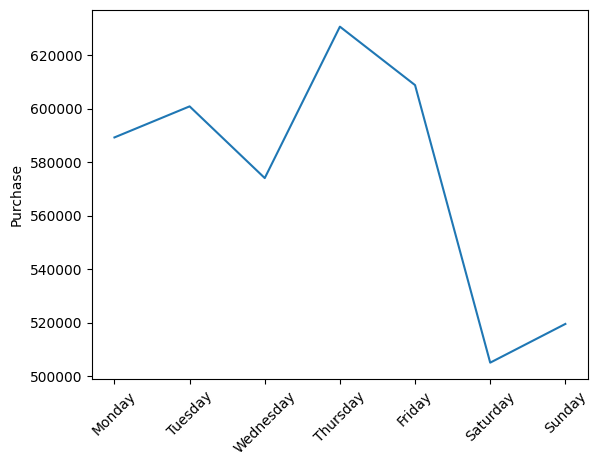

In [ ]:
# Perform the grouping and sum operation outside the plot function for clarity
purchase_sum_by_day = optimized_featured_train_df[['day_of_week','purchase']].groupby('day_of_week').sum()

# Now plot using the result
plt.plot(purchase_sum_by_day)
# plt.plot(optimized_featured_train_df[['day_of_week','purchase']].groupby('day_of_week').sum())
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Purchase')
plt.show()

### Hour:

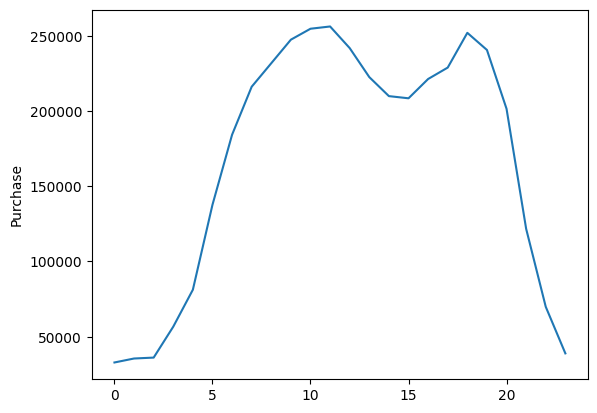

In [ ]:
plt.plot(optimized_featured_train_df[['hour','purchase']].groupby('hour').sum())
plt.ylabel('Hour')
plt.ylabel('Purchase')
plt.show()

### Day of year:

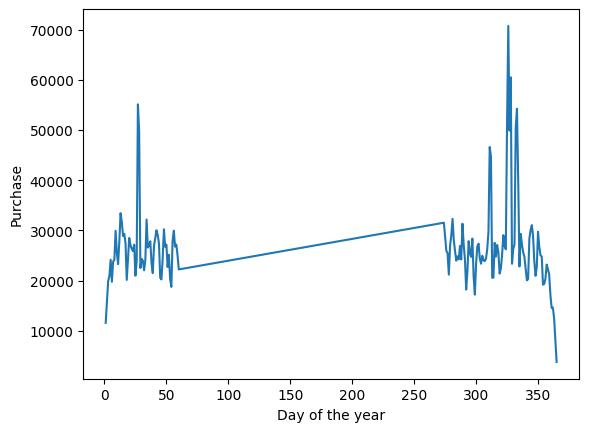

In [ ]:
plt.plot(optimized_featured_train_df[['day_of_year','purchase']].groupby('day_of_year').sum())
plt.xlabel('Day of the year')
plt.ylabel('Purchase')
plt.show()

### Weekend:

<Axes: xlabel='weekend'>

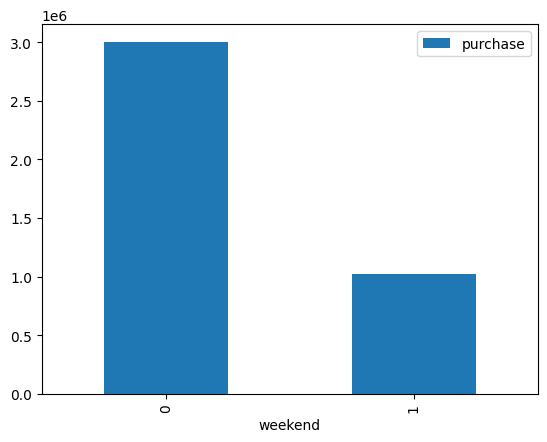

In [ ]:
result_group_year= optimized_featured_train_df[['weekend','purchase']].groupby('weekend').sum()

result_group_year = result_group_year.reset_index(drop=False)
result_group_year.plot.bar(x='weekend', y='purchase')

In [ ]:
print(optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['first_purchase_index'].mean())
print(optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['last_purchase_index'].mean())

print(featured_test_df[featured_test_df['purchase'] == 1]['first_purchase_index'].mean())
print(featured_test_df[featured_test_df['purchase'] == 1]['last_purchase_index'].mean())

56.17102804341501
98.49622486761717
74.28394066373168
102.36660124825404


In [ ]:
session_lengths = optimized_featured_train_df.groupby('session').size().reset_index(name='session_length')
merged_df = pd.merge(optimized_featured_train_df, session_lengths, on='session', how='left')

pd.set_option('display.max_rows', 1000)
merged_df[merged_df['purchase'] == 0][merged_df['session_length'] == 12].head(1000)

ts  type      aid             category  \
1669    1569888167     2  5802432  1487580009286598681   
1670    1569888179     2  5700037  1487580009286598681   
1671    1569888187     2  5700047  1487580009286598681   
1672    1569888192     2  5688124  1487580009311764506   
1673    1569888228     2  5586024  1487580009362096156   
1674    1569888317     2  5700074  1487580009286598681   
1675    1569888583     2  5670729  1487580010796548183   
1676    1569888599     2  5763397  1487580010872045658   
1677    1569888625     2     4783  1487580011157258342   
1678    1569888684     2     4765  1487580010796548183   
1679    1569888703     2     4817  1487580011157258342   
1680    1569888744     3  5687131  1487580008187692007   
3179    1569890841     0  5819639  1487580008162526182   
3180    1569890959     0  5808309  1783999063314661546   
3181    1569891082     0  5789896  1487580006132482952   
3182    1569891114     2  5891173  1487580009496313889   
3183    1569891127     2  5808309  1783999063314661546   
3184    1569891167     0  5819634  1487580008162526182   
3185    1569891247     0  5819638  1487580008162526182   
3186    1569891272     0  5819637  1487580008162526182   
3187    1569891303     0  5819634  1487580008162526182   
3188    1569891340     2  5819634  1487580008162526182   
3189    1569891347     3  5808309  1783999063314661546   
3190    1569891347     3  5808309  1783999063314661546   
6278    1569897934     3  5877529  1487580010645553231   
6279    1569897934     3  5877529  1487580010645553231   
6280    1569897936     3  5770135  1487580010645553231   
6281    1569897936     3  5770135  1487580010645553231   
6282    1569897949     3  5833335  1487580007675986893   
6283    1569897955     3  5885377  1487580007675986893   
6284    1569897955     3  5885377  1487580007675986893   
6285    1569897977     3  5685798  1487580009445982239   
6286    1569897977     3  5685798  1487580009445982239   
6287    1569898080     3  5835924  1487580009471148064   
6288    1569898080     3  5835924  1487580009471148064   
6289    1569898131     3  5882337  1752742606699234159   
7714    1569900498     0  5848909  1487580007675986893   
7715    1569900513     2  5848909  1487580007675986893   
7716    1569900533     0  5809297  1487580007675986893   
7717    1569900537     2  5809297  1487580007675986893   
7718    1569900562     0  5749149  1487580007592100809   
7719    1569900619     0  5749149  1487580007592100809   
7720    1569900823     0  5885388  1487580007675986893   
7721    1570937625     0    16198  1487580010645553231   
7722    1570937667     0     5379  1487580010645553231   
7723    1572285535     0  5877490  1487580007675986893   
7724    1572444705     0  5815662  1487580006317032337   
7725    1576340796     0  5814059  1602943681873052386   
8747    1569902071     0  5884620  1487580011627020412   
8748    1569902131     0  5689170  1487580011585077370   
8749    1569902375     0  5886064  1487580013950664926   
8750    1569902465     0  5886282  1487580013950664926   
8751    1569902576     0  5880640  1487580013950664926   
8752    1569902630     2  5886282  1487580013950664926   
8753    1569902645     3  5862629  2151191071051219817   
8754    1569902655     3  5810136  1487580009445982239   
8755    1569902655     3  5810136  1487580009445982239   
8756    1569902669     2  5836522  1487580013522845895   
8757    1569902671     2  5836522  1487580013522845895   
8758    1569902675     2  5836522  1487580013522845895   
8850    1569902256     2  5853556  1487580005050352469   
8851    1569902377     2  5736345  1487580005050352469   
8852    1569902402     2  5736312  1487580005050352469   
8853    1569902433     2  5736093  1487580005050352469   
8854    1569903029     2  5845348  1487580004916134735   
8855    1569903060     2  5823805  1487580004916134735   
8856    1569903083     2  5823635  1487580004916134735   
8857    1569903098     2  5823615  1487580004916134735   
8858    156990

In [ ]:
optimized_featured_train_df[optimized_featured_train_df['session'] == 'ffd717e0-1330-487a-a04d-979ecfbec996']['type']

113044    2
113045    0
113046    0
113047    0
113048    0
113049    0
113050    0
113051    0
113052    0
113053    0
113054    2
113055    0
Name: type, dtype: int8

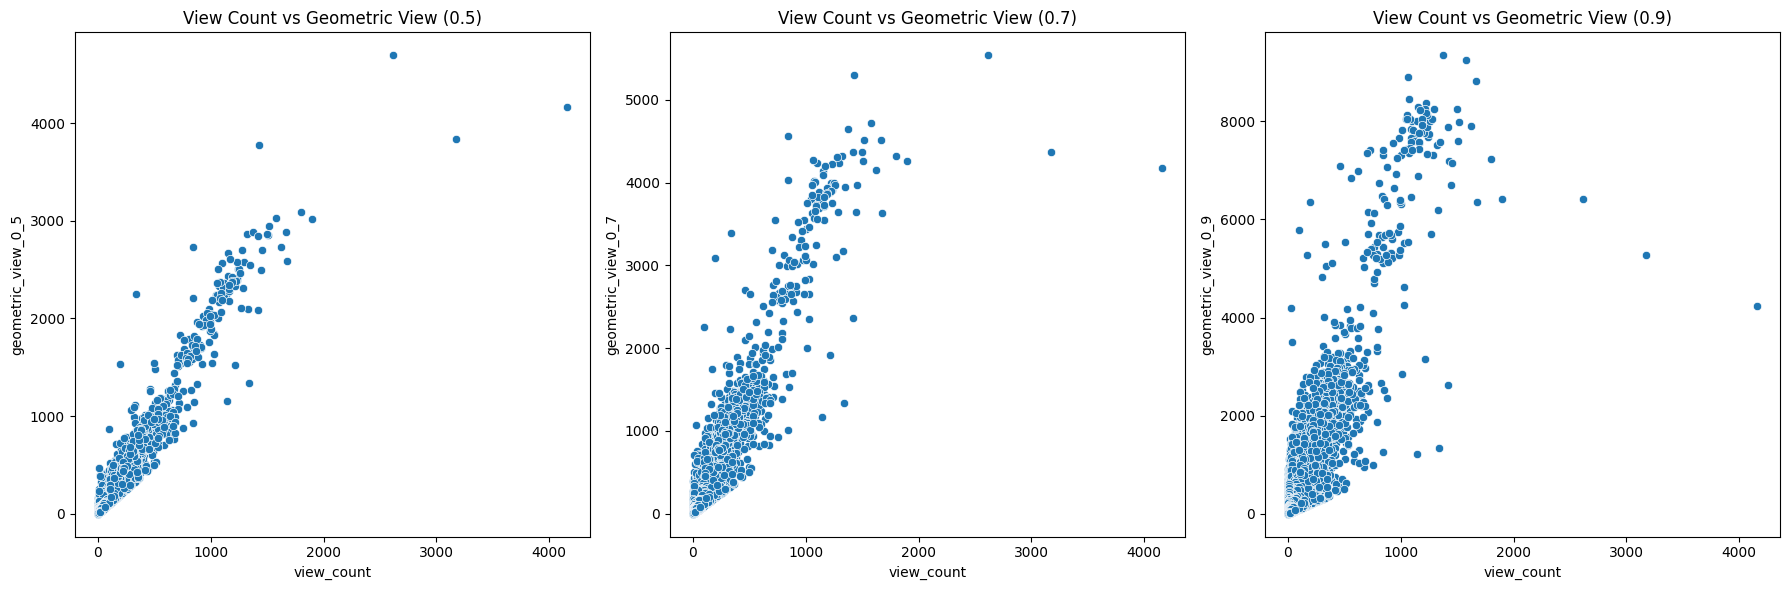

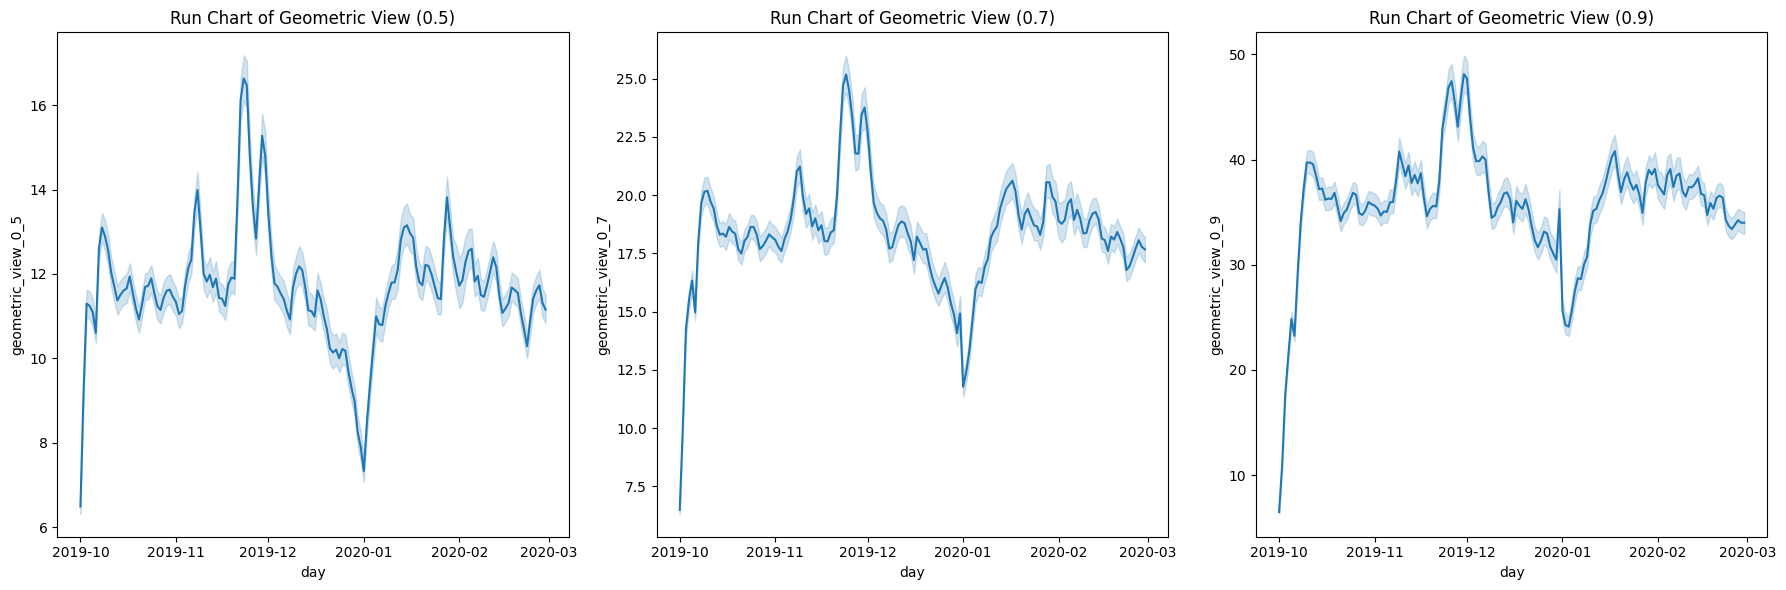

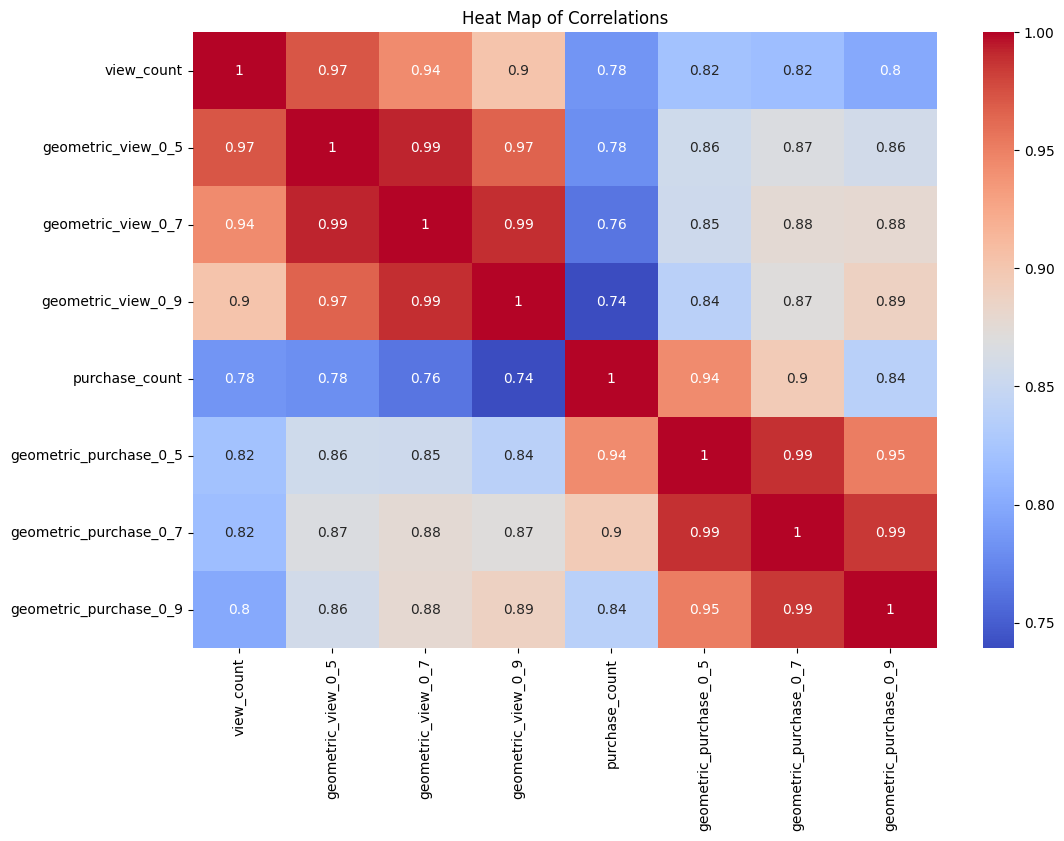

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_view_geometric_sum_df and train_purchase_geometric_sum_df are already loaded

# Merge the dataframes on common columns (e.g., 'aid' and 'day')
combined_df = pd.merge(train_view_geometric_sum_df, train_purchase_geometric_sum_df, on=['aid', 'day'], how='outer')

# Scatterplots
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='view_count', y='geometric_view_0_5', data=combined_df)
plt.title('View Count vs Geometric View (0.5)')
plt.subplot(1, 3, 2)
sns.scatterplot(x='view_count', y='geometric_view_0_7', data=combined_df)
plt.title('View Count vs Geometric View (0.7)')
plt.subplot(1, 3, 3)
sns.scatterplot(x='view_count', y='geometric_view_0_9', data=combined_df)
plt.title('View Count vs Geometric View (0.9)')
plt.tight_layout()
plt.show()

# Run Charts
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.lineplot(x='day', y='geometric_view_0_5', data=combined_df)
plt.title('Run Chart of Geometric View (0.5)')
plt.subplot(1, 3, 2)
sns.lineplot(x='day', y='geometric_view_0_7', data=combined_df)
plt.title('Run Chart of Geometric View (0.7)')
plt.subplot(1, 3, 3)
sns.lineplot(x='day', y='geometric_view_0_9', data=combined_df)
plt.title('Run Chart of Geometric View (0.9)')
plt.tight_layout()
plt.show()

# Heat Map of Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = combined_df[['view_count', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9',
                                  'purchase_count', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlations')
plt.show()


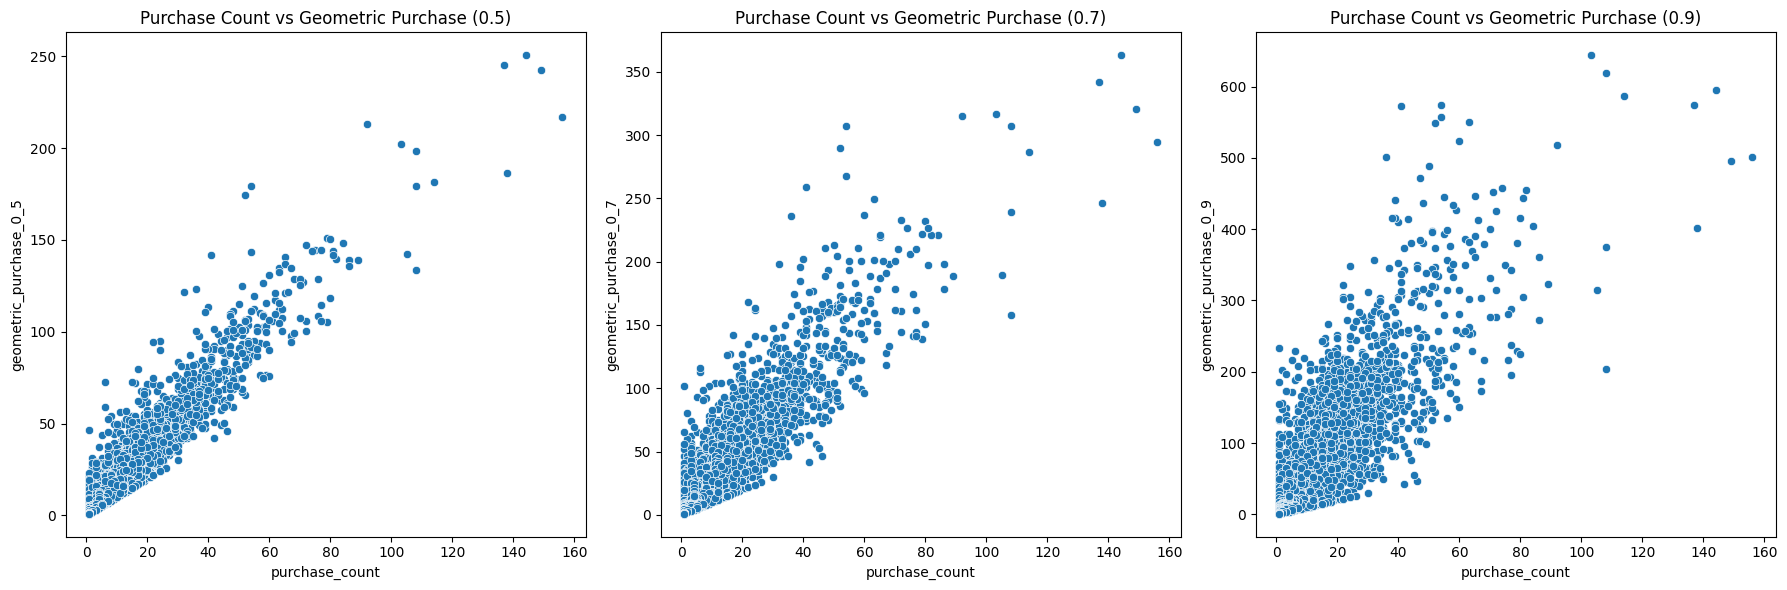

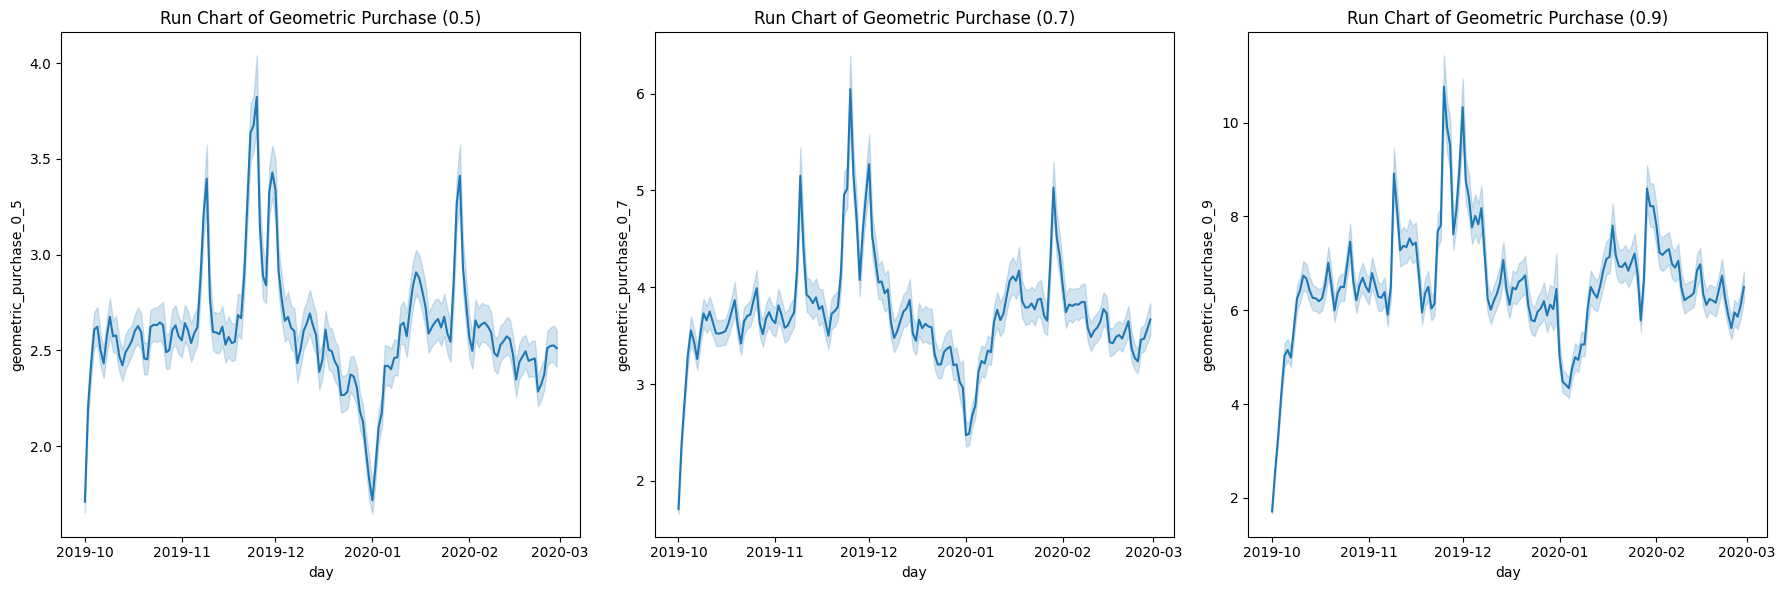

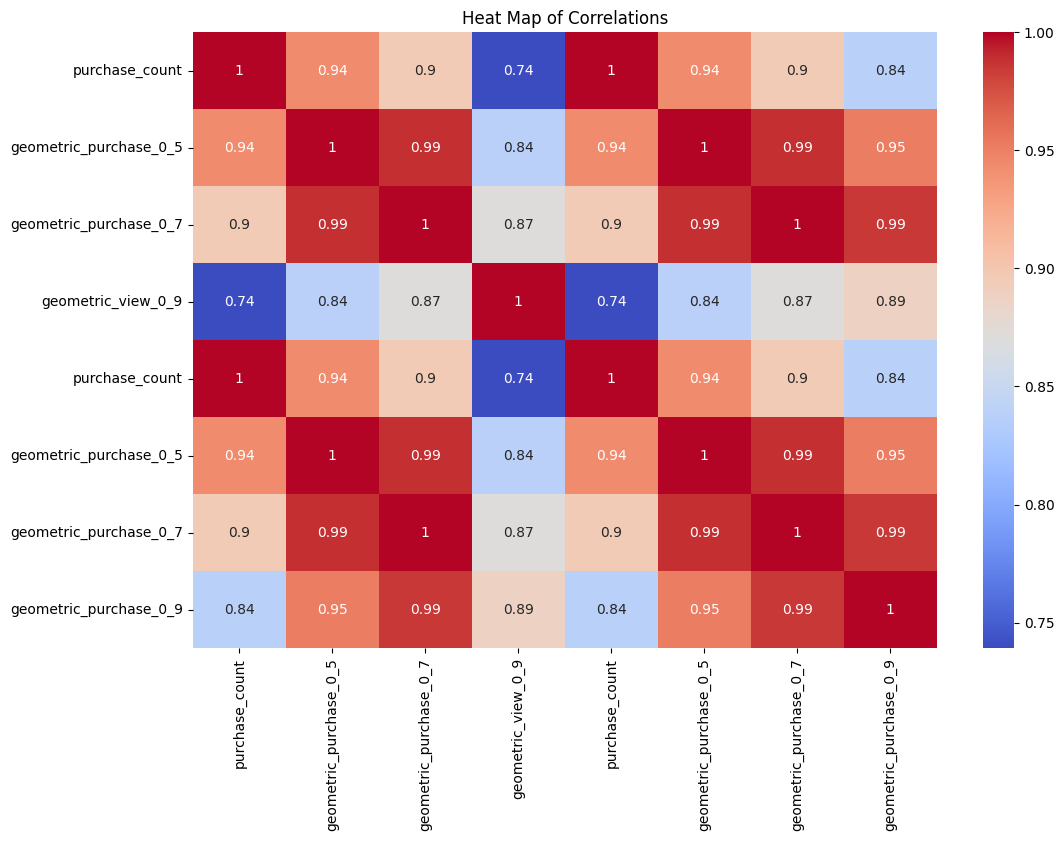

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_view_geometric_sum_df and train_purchase_geometric_sum_df are already loaded

# Merge the dataframes on common columns (e.g., 'aid' and 'day')
combined_df = pd.merge(train_view_geometric_sum_df, train_purchase_geometric_sum_df, on=['aid', 'day'], how='outer')

# Scatterplots
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='purchase_count', y='geometric_purchase_0_5', data=combined_df)
plt.title('Purchase Count vs Geometric Purchase (0.5)')
plt.subplot(1, 3, 2)
sns.scatterplot(x='purchase_count', y='geometric_purchase_0_7', data=combined_df)
plt.title('Purchase Count vs Geometric Purchase (0.7)')
plt.subplot(1, 3, 3)
sns.scatterplot(x='purchase_count', y='geometric_purchase_0_9', data=combined_df)
plt.title('Purchase Count vs Geometric Purchase (0.9)')
plt.tight_layout()
plt.show()

# Run Charts
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.lineplot(x='day', y='geometric_purchase_0_5', data=combined_df)
plt.title('Run Chart of Geometric Purchase (0.5)')
plt.subplot(1, 3, 2)
sns.lineplot(x='day', y='geometric_purchase_0_7', data=combined_df)
plt.title('Run Chart of Geometric Purchase (0.7)')
plt.subplot(1, 3, 3)
sns.lineplot(x='day', y='geometric_purchase_0_9', data=combined_df)
plt.title('Run Chart of Geometric Purchase (0.9)')
plt.tight_layout()
plt.show()

# Heat Map of Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = combined_df[['purchase_count', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_view_0_9',
                                  'purchase_count', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlations')
plt.show()


# 5. Prepare for Training:

## 5.1. Filter Columns:

In [ ]:
optimized_featured_train_df.columns

Index(['ts', 'type', 'aid', 'category', 'session', 'purchase',
       'total_unique_items', 'total_unique_categories', 'session_duration',
       'total_viewed_items', 'day_of_year', 'day_of_week', 'day_of_month',
       'month', 'hour', 'timeofday', 'weekend', 'click_rate',
       'event_dwell_time', 'product_dwell_time', 'max_popularity',
       'min_popularity', 'date', 'day', 'trendiness_0_5', 'trendiness_0_7',
       'trendiness_0_9', 'first_purchase_index', 'last_purchase_index'],
      dtype='object')

In [ ]:
featured_test_df.columns

Index(['ts', 'type', 'aid', 'category', 'session', 'purchase', 'day_of_year',
       'day_of_week', 'day_of_month', 'month', 'hour', 'timeofday', 'weekend',
       'total_viewed_items', 'total_unique_items', 'total_unique_categories',
       'max_popularity', 'min_popularity', 'session_duration', 'click_rate',
       'event_dwell_time', 'product_dwell_time', 'day', 'trendiness_0_5',
       'trendiness_0_7', 'trendiness_0_9', 'session_index',
       'first_purchase_index', 'last_purchase_index', 'total_events'],
      dtype='object')

In [ ]:
## Features set without trendiness feature
features = ['purchase', 'day_of_week', 'month',
       'hour', 'weekend', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
       'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']

# Features set with trendiness feature with the forgetting factor alpha 0.5
# features = ['purchase', 'day_of_week', 'month',
#        'hour', 'weekend', 'day_of_year', 'total_viewed_items',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#        'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']

## Features set with trendiness feature with the forgetting factor alpha 0.7
# features = ['purchase', 'day_of_week', 'month',
#        'hour', 'weekend', 'day_of_year', 'total_viewed_items',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#        'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_7']

# Features set with trendiness feature with the forgetting factor alpha 0.9
# features = ['purchase', 'day_of_week', 'month',
#        'hour', 'weekend', 'day_of_year', 'total_viewed_items',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#        'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_9']


In [ ]:
train_df = optimized_featured_train_df.loc[:, features]


In [ ]:
test_df = featured_test_df.loc[:, features]

In [ ]:
print(len(test_df.columns) == len(train_df.columns))

True


## 5.2. Information:

In [ ]:
print('Train Dataset:')
print(train_df[train_df['purchase'] == 0].shape)
print(train_df[train_df['purchase'] == 1].shape)
print('Number of non-purchase sessions: ',
      optimized_featured_train_df[optimized_featured_train_df['purchase'] == 0]['session'].nunique())
print('Number of purchase sessions: ',
      optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['session'].nunique())
print('Average first purchase position: ',
      optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['first_purchase_index'].mean())
print('Average last purchase position: ',
      optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['last_purchase_index'].mean())

print('Test Dataset:')
print(test_df[test_df['purchase'] == 0].shape)
print(test_df[test_df['purchase'] == 1].shape)
print('Number of non-purchase sessions: ',
      featured_test_df[featured_test_df['purchase'] == 0]['session'].nunique())
print('Number of purchase sessions: ',
      featured_test_df[featured_test_df['purchase'] == 1]['session'].nunique())
print('Average first purchase position: ',
      featured_test_df[featured_test_df['purchase'] == 1]['first_purchase_index'].mean())
print('Average last purchase position: ',
      featured_test_df[featured_test_df['purchase'] == 1]['last_purchase_index'].mean())

Train Dataset:
(15629996, 6)
(4028468, 6)
Number of non-purchase sessions:  4180324
Number of purchase sessions:  145617
Average first purchase position:  56.17102804341501
Average last purchase position:  98.49622486761717
Test Dataset:
(751581, 6)
(282795, 6)
Number of non-purchase sessions:  200000
Number of purchase sessions:  10000
Average first purchase position:  74.28394066373168
Average last purchase position:  102.36660124825404


## 5.2. Create Train and Test datasets:

In [ ]:
# Create Train dataset for 9 features:
X_train = train_df.drop(columns=['purchase'])
y_train = train_df['purchase']

In [ ]:
# Create Test dataset for 9 features:
y_test = test_df['purchase']
X_test = test_df.drop(['purchase'], axis=1)

# 6. Handle Imbalance:

In [ ]:
total_events_count = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1].groupby('session').size().reset_index(name='total_events')
length_of_purchase_session_avg = total_events_count['total_events'].mean()
length_of_purchase_session_avg

27.703139056566197

In [ ]:
first_purchase_index_per_purchase_session = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1].groupby('session').first()['first_purchase_index']
first_purchase_length_avg = first_purchase_index_per_purchase_session.mean() + 1
first_purchase_length_avg

18.80641683319942

In [ ]:
purchase_sessions = train_df[train_df['purchase'] == 1]
print(purchase_sessions.info())

# Calculate averages and distributions for each feature
feature_means = purchase_sessions.mean()
feature_stds = purchase_sessions.std()
print('=============================================================')
print(feature_means)

print('=============================================================')
print(feature_stds)

<class 'pandas.core.frame.DataFrame'>
Index: 4034048 entries, 0 to 19667991
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   purchase                 int8   
 1   day_of_week              int64  
 2   month                    float32
 3   hour                     int64  
 4   weekend                  int64  
 5   day_of_year              int64  
 6   total_viewed_items       float32
 7   total_unique_items       float32
 8   session_duration         float32
 9   click_rate               float32
 10  max_popularity           int64  
 11  min_popularity           int64  
 12  total_unique_categories  float32
 13  product_dwell_time       float64
 14  event_dwell_time         float64
dtypes: float32(6), float64(2), int64(6), int8(1)
memory usage: 373.2 MB
None
purchase                      1.000000
day_of_week                   2.908955
month                         7.281785
hour                         12.617767
weekend    

## 6.1 Over-Sampling:

### 6.1.1 Event-based:


In [ ]:
smote = SMOTE(sampling_strategy=0.3)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

### 6.1.2 Session-based:


In [ ]:
# # Round the averages
# first_purchase_length_avg = int(round(first_purchase_length_avg))
# length_of_session_avg = int(round(length_of_purchase_session_avg))

# print(f'Average first purchase length: {first_purchase_length_avg}')
# print(f'Average session length: {length_of_session_avg}')

# # Example function to create synthetic session events
# def create_synthetic_session(first_purchase_length, session_length):
#   first_purchase_length = int(first_purchase_length)
#   session_length = int(session_length)
#   events = ['view'] * (first_purchase_length - 1) + ['purchase'] + ['view'] * (session_length - first_purchase_length)
#   return events

# # Generate synthetic session features
# def generate_synthetic_features(num_synthetic_sessions, feature_means, feature_stds):
#   synthetic_features = {}
#   for feature in feature_means.index:
#       synthetic_features[feature] = np.random.normal(feature_means[feature], feature_stds[feature], num_synthetic_sessions)
#   return pd.DataFrame(synthetic_features)

# # Calculate the number of synthetic sessions needed
# number_of_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['session'].nunique()
# number_of_non_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] != 1]['session'].nunique()
# num_synthetic_sessions_needed = round(number_of_non_purchase_sessions * 0.1) - number_of_purchase_sessions
# print('========================================================')
# print('number of purchase sessions: ', number_of_purchase_sessions)
# print('number of non-purchase sessions: ', number_of_non_purchase_sessions)

# print('========================================================')
# print('num_synthetic_sessions_needed: ', num_synthetic_sessions_needed)

# # Generate synthetic sessions
# synthetic_sessions = []
# for i in range(num_synthetic_sessions_needed):
#   synthetic_session_id = f'synthetic_session_{i}'
#   events = create_synthetic_session(first_purchase_length_avg, length_of_purchase_session_avg)
#   for event_index, event_type in enumerate(events):
#     synthetic_sessions.append([synthetic_session_id, event_index, event_type])

# # Convert to DataFrame
# synthetic_sessions_df = pd.DataFrame(synthetic_sessions, columns=['session_id', 'event_index', 'event_type'])

# print('number of synthetic events: ', synthetic_sessions_df.shape)
# print('number of synthetic sessions: ', synthetic_sessions_df['session_id'].nunique())

# # Generate synthetic features
# synthetic_features_df = generate_synthetic_features(num_synthetic_sessions_needed, feature_means, feature_stds)


In [ ]:
# # Ensure the synthetic features have the correct length
# synthetic_features_expanded = pd.DataFrame(
#     np.repeat(synthetic_features_df.values,length_of_purchase_session_avg, axis=0),
#     columns=synthetic_features_df.columns
# )

# # Combine synthetic sessions with synthetic features
# synthetic_data = pd.concat(
#     [
#         synthetic_sessions_df.reset_index(drop=True),
#         synthetic_features_expanded.reset_index(drop=True)
#     ], axis=1)

# synthetic_data

In [ ]:
# # Combine synthetic data with original data
# balanced_data = pd.concat([train_df, synthetic_data], ignore_index=True)

# # Sort by session_id and event_index
# balanced_data = balanced_data.sort_values(by=['session_id', 'event_index'])

# # Now you can train your model with the balanced dataset
# balanced_data

In [ ]:
# # Create Train dataset for 9 features:
# X_train_smt = balanced_data.drop(columns=['purchase', 'session_id', 'event_index', 'event_type'])
# y_train_smt = balanced_data['purchase']

In [ ]:
print(X_train_smt.shape)
print(X_train.shape)
print(X_test.shape)

(20324283, 14)
(19668112, 14)
(1020130, 14)


## 6.2 Combination of Over-Sampling and Random Under-Sampling:

### 6.2.1 Event-based:


In [ ]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_over_and_under, y_train_over_and_under = pipeline.fit_resample(X_train, y_train)

### 6.2.2 Session-based:


In [ ]:
# from sklearn.utils import resample

# # Identify non-purchase sessions
# non_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] != 1]['session'].unique()

# # Perform under-sampling
# num_non_purchase_sessions_to_keep = len(optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['session'].unique())
# print('num_non_purchase_sessions_to_keep: ', num_non_purchase_sessions_to_keep)

# under_sampled_non_purchase_sessions = resample(non_purchase_sessions, n_samples=(num_non_purchase_sessions_to_keep * 15), random_state=42)


# # Filter the original data to keep only the under-sampled non-purchase sessions
# under_sampled_data = optimized_featured_train_df[optimized_featured_train_df['session'].isin(under_sampled_non_purchase_sessions)]

# # Combine the under-sampled non-purchase sessions with the original purchase sessions
# purchase_sessions_data = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]
# combined_data = pd.concat([under_sampled_data, purchase_sessions_data])

In [ ]:
features

['purchase',
 'day_of_week',
 'month',
 'hour',
 'weekend',
 'day_of_year',
 'total_viewed_items',
 'total_unique_items',
 'session_duration',
 'click_rate',
 'max_popularity',
 'min_popularity',
 'total_unique_categories',
 'product_dwell_time',
 'event_dwell_time']

In [ ]:
# # Combine synthetic data with under-sampled data
# combined_data_renamed = combined_data.rename(columns={
#     'session': 'session_id',
#     'type': 'event_type',
#     'day_of_week': 'day_of_week',
#     'month': 'month',
#     'hour': 'hour',
#     'day_of_year': 'day_of_year',
#     'total_viewed_items': 'total_viewed_items',
#     'total_unique_items': 'total_unique_items',
#     'session_duration': 'session_duration',
#     'click_rate': 'click_rate',
#     'max_popularity': 'max_popularity',
#     'min_popularity': 'min_popularity',
#     'total_unique_categories': 'total_unique_categories',
#     'product_dwell_time': 'product_dwell_time',
#     'event_dwell_time': 'event_dwell_time',
#     'weekend': 'weekend',
# }).drop(columns=['ts', 'aid', 'category', 'day_of_month',
#                  'timeofday', 'day', 'date',
#                  'trendiness_0_5', 'trendiness_0_7', 'trendiness_0_9', 'first_purchase_index', 'last_purchase_index'])

# combined_balanced_data = pd.concat([combined_data_renamed, synthetic_data], ignore_index=True)

# # Sort by session_id and event_index
# combined_balanced_data = combined_balanced_data.sort_values(by=['session_id', 'event_index'])

# # Now you can train your model with the balanced dataset
# combined_balanced_data.shape

In [ ]:
# # Combination:
# X_train_over_and_under = combined_balanced_data.drop(columns=['purchase', 'session_id', 'event_index', 'event_type'])
# y_train_over_and_under = combined_balanced_data['purchase']

# 7. Evaluation methods:

In [ ]:
def calculate_score(position, first_purchase, last_purchase, total, purchase, prediction):
    if purchase == 1 and prediction == 1:
        if position <= 1:
            return 2
        elif 1 < position < first_purchase:
            return 1 + ((first_purchase - position) / first_purchase)
        elif first_purchase <= position <= last_purchase:
            return 1
        elif last_purchase < position <= total and total > last_purchase:
            return (total - position) / (total - last_purchase)
        else:
            return 0
    elif purchase == 1 and prediction == 0:
        if 0 <= position < first_purchase:
            return 0
        elif first_purchase <= position <= last_purchase:
            return -1
        elif last_purchase < position <= total and total > last_purchase:
            return -1 - (last_purchase - position) / (last_purchase - total)
        else:
            return -2
    elif purchase == 0 and prediction == 1:
        return -0.05 * (position / total)
    elif purchase == 0 and prediction == 0:
        return 0.05
    else:
        return None

In [ ]:
X_test['session'] = featured_test_df['session']
X_test['type'] = featured_test_df['type']
X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
X_test['session_index'] = featured_test_df['session_index']
X_test['total_events'] = featured_test_df['total_events']

X_test['purchase'] = featured_test_df['purchase']
X_test

day_of_week  month  hour  weekend  day_of_year  total_viewed_items  \
0                  4      1    20        0           17                   1   
1                  4      2    13        0           38                   1   
2                  3     12    10        0          353                   1   
3                  6     11    12        1          307                   1   
4                  5     11     7        1          306                   1   
...              ...    ...   ...      ...          ...                 ...   
1020125            4      2    19        0           52                   9   
1020126            4      2    19        0           52                   9   
1020127            4      2    19        0           52                   9   
1020128            5      2    18        1           60                   1   
1020129            5      2    18        1           60                   2   

        total_unique_items  session_duration  click_rate max_popularity  \
0                        1                 0    0.000000              1   
1                        1                 0    0.000000              1   
2                        1                 0    0.000000              1   
3                        1                 0    0.000000              1   
4                        1                 0    0.000000              1   
...                    ...               ...         ...            ...   
1020125                  5              1415    0.381625              3   
1020126                  5              1415    0.381625              3   
1020127                  5              1415    0.381625              3   
1020128                  1                 0    0.000000              1   
1020129                  1              3249    0.036934              2   

        min_popularity total_unique_categories  product_dwell_time  \
0                    1                       1      1790146.000000   
1                    1                       1      4331651.000000   
2                    1                       1      3965592.000000   
3                    1                       1       105813.000000   
4                    1                       1      1054168.000000   
...                ...                     ...                 ...   
1020125              1                       4          509.000000   
1020126              1                       4          320.000000   
1020127              2                       4       685261.000000   
1020128              1                       1         3249.000000   
1020129              2                       1         3249.000000   

         event_dwell_time                               session  type  \
0          1790146.000000  0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b     0   
1          4331651.000000  0000de26-bd58-42c9-9173-4763c76b398e     0   
2          3965592.000000  00019957-976e-4513-bbc0-7229e590a6de     0   
3           105813.000000  0001dfaa-d88e-4759-81a5-126d6f37a136     0   
4          1054168.000000  0002fa59-571a-452c-9846-58b3cc8344bc     0   
...                   ...                                   ...   ...   
1020125          0.000000  ffff78e3-1e8f-4eda-bb42-95749ab4f42e     1   
1020126          0.000000  ffff78e3-1e8f-4eda-bb42-95749ab4f42e     1   
1020127     685139.000000  ffff78e3-1e8f-4eda-bb42-95749ab4f42e     1   
1020128       3249.000000  ffffd3f5-3fdc-45fb-b122-0469960a9834     0   
1020129          0.000000  ffffd3f5-3fdc-45fb-b122-0469960a9834     0   

         first_purchase_index  last_purchase_index  session_index  \
0                   -1.000000            -1.000000              0   
1                   -1.000000            -1.000000              0   
2                   -1.000000            -1.000000              0   
3                   -1.000000            -1.000000              0   
4                   -1.000000            -1.000000              0   
...                       .

In [ ]:
def plot_max_scores(y_pred):
  X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
  X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
  X_test['session_index'] = featured_test_df['session_index']
  X_test['total_events'] = featured_test_df['total_events']
  X_test['pred_purchase'] = y_pred

  X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
  X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

  # unique_max_scores_per_session = X_test.drop_duplicates(subset=['session', 'max_score'])
  # unique_max_scores_counts = unique_max_scores_per_session['max_score'].value_counts().head(10)
  # unique_max_scores_counts.plot(kind='bar')

  # Find the top 10 highest unique max scores
  top_10_unique_max_scores = X_test['max_score'].drop_duplicates().nlargest(10)
  # Now filter the DataFrame to only those rows where the max_score is one of the top 10
  top_10_max_scores_counts = X_test[X_test['max_score'].isin(top_10_unique_max_scores)]
  # Get value counts for these top 10 max scores
  value_counts_top_10_max_scores = top_10_max_scores_counts['max_score'].value_counts()
  value_counts_top_10_max_scores.plot(kind='bar')



In [ ]:
def count_early_predictions(y_pred):
  X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
  X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
  X_test['session_index'] = featured_test_df['session_index']
  X_test['total_events'] = featured_test_df['total_events']
  X_test['pred_purchase'] = y_pred

  X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
  X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

  # Filter rows where max_score is greater than 1.0
  score_count = X_test[X_test['max_score'] > 1.0]['session'].nunique()
  return score_count


In [ ]:
def original_calculate_auc_score(y_pred, method):
  X_test['pred_type'] = y_pred

  X_test['session'] = featured_test_df['session']
  X_test['type'] = featured_test_df['type']
  X_test['purchase'] = featured_test_df['purchase']

  # Create a separate DataFrame to identify sessions with type 2 event (order event)
  predicted_buy_test_sessions = X_test.loc[X_test['pred_type'] == 1, 'session'].drop_duplicates()

  # Create the 'pred_purchase' column based on whether each session has an order event or not
  X_test['pred_purchase'] = X_test['session'].isin(predicted_buy_test_sessions)
  X_test['pred_purchase'] = X_test['pred_purchase'].astype(int)

  pred_session_values = X_test['pred_purchase']

  print("\033[1m\033[94mEvaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):\033[0m")
  print('(non-purchase events:', y_test[y_test == 0].shape[0], ', purchase events:', y_test[y_test == 1].shape[0], ')')
  print("ROC AUC DecisionTreeClassifier ", method, ' :', metrics.roc_auc_score(y_test, pred_session_values))

In [ ]:
number_of_test_sessions = X_test['session'].nunique()
print('number_of_test_sessions: ', number_of_test_sessions)
number_of_test_purchased_sessions = X_test[X_test['purchase'] == 1]['session'].nunique()
print('number_of_test_purchased_sessions: ', number_of_test_purchased_sessions)
number_of_test_non_purchased_sessions = X_test[X_test['purchase'] == 0]['session'].nunique()
print('number_of_test_non_purchased_sessions: ', number_of_test_non_purchased_sessions)

number_of_test_sessions:  210000
number_of_test_purchased_sessions:  10000
number_of_test_non_purchased_sessions:  200000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Function to calculate and plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC curve and calculate AUC score
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve_alternative(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {title}')
    plt.show()

# Assuming calculate_auc_score now returns AUC score for plotting purposes
def calculate_auc_score(y_true, y_prob, title):
    auc_score = roc_auc_score(y_true, y_prob)
    print(f'AUC Score for {title}: {auc_score:.2f}')
    return auc_score

# Feature importance plot function
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = importances.argsort()
    plt.figure()
    plt.title(f"Feature importances - {title}")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def calculate_early_predictions(y_pred, X_test):
  rf_early_predicted_sessions = count_early_predictions(y_pred)
  print(X_test.columns)
  print(len(X_test.columns))
  print('========================================================================================')
  print(rf_early_predicted_sessions, '/', number_of_test_purchased_sessions)
  print('========================================================================================')

# Calculate AUC Score with Custom Logic
def custom_calculate_auc_score(y_pred, X_test, featured_test_df, method):
    X_test['pred_type'] = y_pred
    X_test['session'] = featured_test_df['session']
    X_test['type'] = featured_test_df['type']
    X_test['purchase'] = featured_test_df['purchase']

    # Identify sessions with predicted purchase events
    predicted_buy_test_sessions = X_test.loc[X_test['pred_type'] == 1, 'session'].drop_duplicates()

    # Create the 'pred_purchase' column based on whether each session has an order event or not
    X_test['pred_purchase'] = X_test['session'].isin(predicted_buy_test_sessions).astype(int)

    # Extract the actual session-based purchase data
    actual_purchase_sessions = X_test.loc[X_test['purchase'] == 1, 'session'].drop_duplicates()
    X_test['actual_purchase'] = X_test['session'].isin(actual_purchase_sessions).astype(int)

    pred_session_values = X_test['pred_purchase']
    true_session_values = X_test['actual_purchase']

    print("\033[1m\033[94mEvaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):\033[0m")
    print('(non-purchase events:', (y_test == 0).sum(), ', purchase events:', (y_test == 1).sum(), ')')
    auc_score = metrics.roc_auc_score(true_session_values, pred_session_values)
    print('========================================================================================')
    print("ROC AUC DecisionTreeClassifier ", method, ' :', auc_score)
    print('========================================================================================')
    return auc_score, true_session_values, pred_session_values

def plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred):
    X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
    X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
    X_test['session_index'] = featured_test_df['session_index']
    X_test['total_events'] = featured_test_df['total_events']
    X_test['pred_purchase'] = y_pred
    X_test['session'] = featured_test_df['session']
    X_test['purchase'] = featured_test_df['purchase']

    X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
    X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

    # Filter rows where max_score is greater than 1.0
    X_test_filtered = X_test[X_test['max_score'] > 1.0]

    X_test_filtered['rounded_score'] = X_test_filtered['max_score'].round(2)
    # Group by max_score and count the number of sessions for each score
    score_session_counts = X_test_filtered.groupby('rounded_score')['session'].nunique().reset_index(name='session_count')

    # Sort the scores by the count of sessions and select the top 20
    top_20_scores = score_session_counts.sort_values(by='session_count', ascending=False).head(20)
    top_20_scores = top_20_scores.sort_values(by='rounded_score', ascending=False)
    print(top_20_scores)

    # Set the index to int_score to use it as x-axis labels
    top_20_scores.set_index('rounded_score', inplace=True)

    top_20_scores.plot(kind="bar", figsize=(10, 6), legend=False)
    plt.xlabel('Early Purchase Prediction Scores')
    plt.ylabel('Number of Sessions')
    plt.title('Top Early Purchase Prediction Scores with the Most Number of Sessions')
    plt.xticks(rotation=45)
    plt.show()

# 8. Experiments and Results:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
columns_to_remove = ['session','type', 'first_purchase_index',
                     'last_purchase_index', 'session_index',
                     'total_events', 'purchase', 'score',
                     'max_score', 'pred_type', 'pred_purchase', 'actual_purchase', 'date']

## 8.1. RandomForestClassifier:

In [ ]:
# %%time

# X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
# train_columns = X_train.columns
# X_test = X_test[train_columns]

# # Create RandomForestClassifier object
# clf = RandomForestClassifier(n_estimators=100)
# # Train RandomForestClassifier
# clf_rf = clf.fit(X_train,y_train)
# #Predict the response for test dataset
# y_pred_rf = clf_rf.predict(X_test)

In [ ]:
# auc_score_original_rf, true_session_values_rf, pred_session_values_rf = custom_calculate_auc_score(y_pred_rf, X_test, featured_test_df, 'Original OpenCDP Dataset with RF')
# calculate_early_predictions(y_pred_rf, X_train)

# plot_confusion_matrix(true_session_values_rf, pred_session_values_rf, 'Original OpenCDP Dataset with RF')
# plot_roc_curve(true_session_values_rf, pred_session_values_rf, 'Original OpenCDP Dataset with RF')
# plot_precision_recall_curve_alternative(true_session_values_rf, pred_session_values_rf, 'Original OpenCDP Dataset with RF')
# plot_feature_importances(clf_rf, X_train.columns, 'Original OpenCDP Dataset with RF')

In [ ]:
# plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_rf)

In [ ]:
# %%time

# X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
# train_columns = X_train_smt.columns
# X_test = X_test[train_columns]

# # Create RandomForestClassifier object
# clf_smt = RandomForestClassifier(n_estimators=100)
# # Train RandomForestClassifier
# clf_rf_smt = clf_smt.fit(X_train_smt,y_train_smt)

# # Predict the response for test dataset
# y_pred_smt_rf = clf_rf_smt.predict(X_test)

In [ ]:
# auc_score_original_smt_rf, true_session_values_smt_rf, pred_session_values_smt_rf = custom_calculate_auc_score(y_pred_smt_rf, X_test, featured_test_df, 'OpenCDP Dataset Balanced using Over-Sampling with RF')
# calculate_early_predictions(y_pred_smt_rf, X_train)

# plot_confusion_matrix(true_session_values_smt_rf, pred_session_values_smt_rf, 'OpenCDP Dataset Balanced using Over-Sampling with RF')
# plot_roc_curve(true_session_values_smt_rf, pred_session_values_smt_rf, 'OpenCDP Dataset Balanced using Over-Sampling with RF')
# plot_precision_recall_curve_alternative(true_session_values_smt_rf, pred_session_values_smt_rf, 'OpenCDP Dataset Balanced using Over-Sampling with RF')
# plot_feature_importances(clf_rf_smt, X_train.columns, 'OpenCDP Dataset Balanced using Over-Sampling with RF')

In [ ]:
# plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_smt_rf)

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Create RandomForestClassifier object
clf_over_and_under = RandomForestClassifier()
# Train RandomForestClassifier
clf_rf_over_and_under = clf_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)
#Predict the response for test dataset
y_pred_over_and_under_rf = clf_rf_over_and_under.predict(X_test)

CPU times: user 53min 16s, sys: 47.7 s, total: 54min 4s
Wall time: 53min 50s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF  : 0.6689368337727154
Index(['day_of_week', 'month', 'hour', 'weekend', 'day_of_year',
       'total_viewed_items', 'total_unique_items', 'session_duration',
       'click_rate', 'max_popularity', 'min_popularity',
       'total_unique_categories', 'product_dwell_time', 'event_dwell_time'],
      dtype='object')
14
2227 / 10000


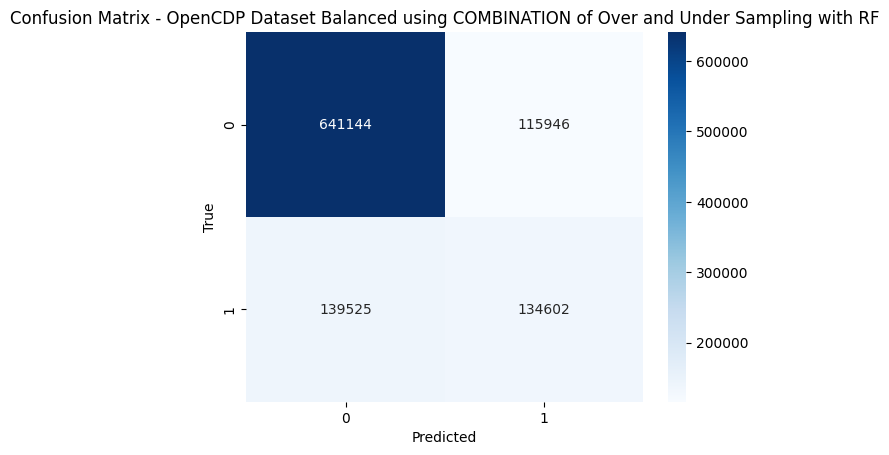

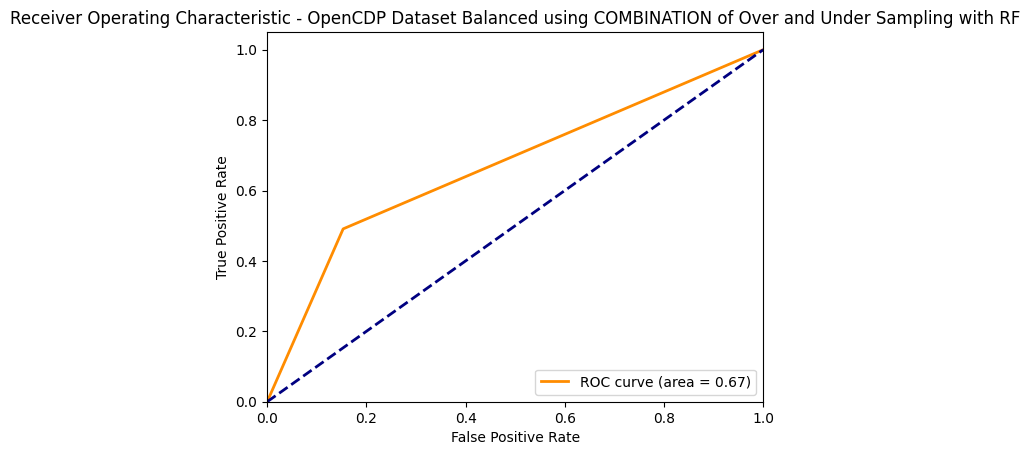

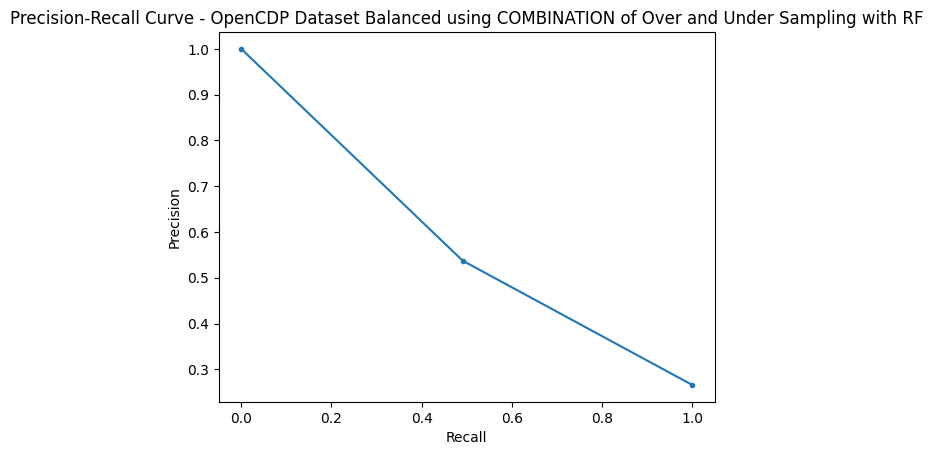

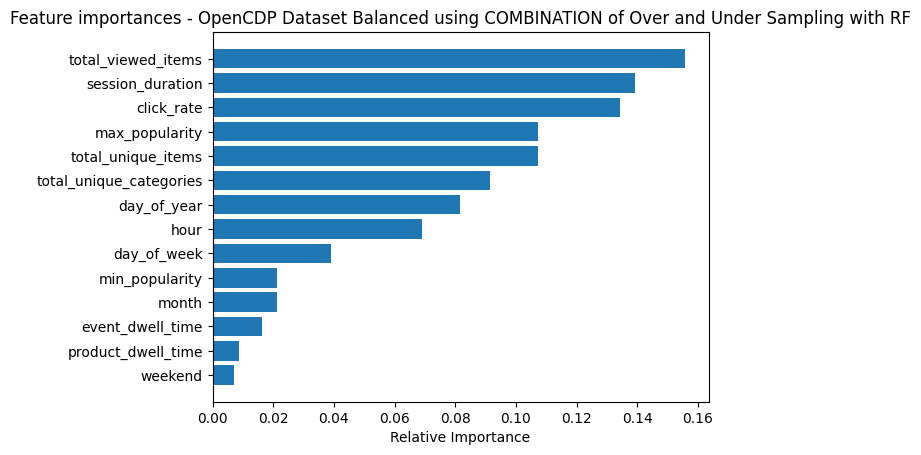

In [ ]:
auc_score_original_over_and_under_rf, true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf = custom_calculate_auc_score(y_pred_over_and_under_rf, X_test, featured_test_df, 'OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
calculate_early_predictions(y_pred_over_and_under_rf, X_train)

plot_confusion_matrix(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_roc_curve(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_precision_recall_curve_alternative(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_feature_importances(clf_rf_over_and_under, X_train.columns, 'OpenCDP Dataset Balanced using COMBINATION of Over and Under Sampling with RF')

    rounded_score  session_count
98       2.000000            855
61       1.620000             22
56       1.570000             21
49       1.500000             31
42       1.430000             22
41       1.420000             26
37       1.380000             26
32       1.330000             34
31       1.320000             25
28       1.290000             33
24       1.250000             32
19       1.200000             28
18       1.190000             22
17       1.180000             27
16       1.170000             34
13       1.140000             22
11       1.120000             25
10       1.110000             25
9        1.100000             26
7        1.080000             30


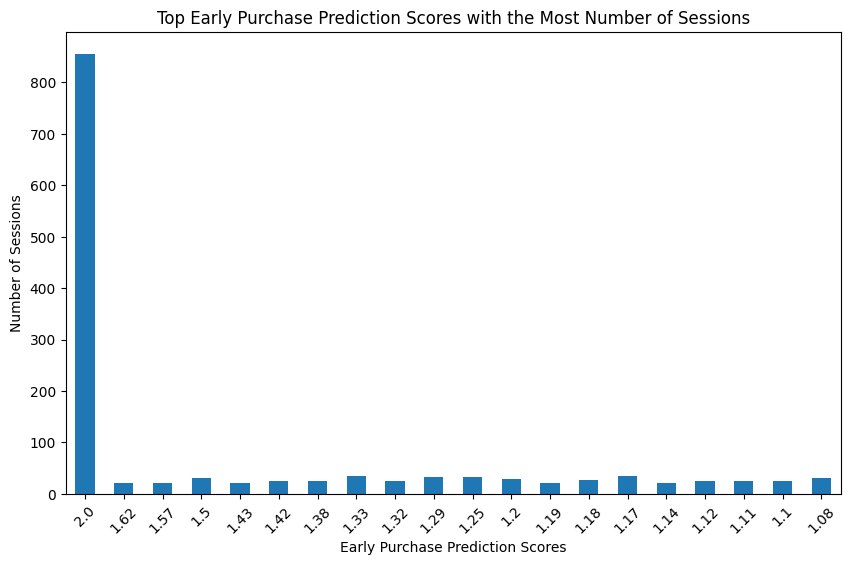

In [ ]:
plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_over_and_under_rf)

### **9.2. Gaussian Naive Bayes:**

In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

model = GaussianNB()
model.fit(X_train, y_train)

y_pred_nb = model.predict(X_test)

CPU times: user 5.67 s, sys: 2.01 s, total: 7.68 s
Wall time: 7.63 s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_nb, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.6996035840413196


In [ ]:
nb_early_predicted_sessions = count_early_predictions(y_pred_nb)
print(features)
print(nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5761 / 10000


In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

model_smt = GaussianNB()
model_smt.fit(X_train_smt, y_train_smt)

y_pred_smt_nb = model_smt.predict(X_test)

CPU times: user 5.89 s, sys: 1.98 s, total: 7.87 s
Wall time: 7.81 s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_nb, 'OVERSAMPLING')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  OVERSAMPLING  : 0.7010557618141207


In [ ]:
smt_nb_early_predicted_sessions = count_early_predictions(y_pred_smt_nb)
print(features)
print(smt_nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5722 / 10000


In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

model_over_and_under = GaussianNB()
model_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)

y_pred_over_and_under_nb = model_over_and_under.predict(X_test)

CPU times: user 4.38 s, sys: 1.41 s, total: 5.79 s
Wall time: 5.75 s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_nb, 'COMBINATION')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  COMBINATION  : 0.7048496939267149


In [ ]:
over_and_under_nb_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_nb)
print(features)
print(over_and_under_nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5691 / 10000


### **9.3. BaggingClassifier:**

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_bg = model.fit(X_train, y_train)

y_pred_bg = clf_bg.predict(X_test)

CPU times: user 18min 39s, sys: 10.2 s, total: 18min 49s
Wall time: 18min 45s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_bg, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.7078242404957201


In [ ]:
bagging_early_predicted_sessions = count_early_predictions(y_pred_bg)
print(features)
print(bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
3496 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_smt_bg = model.fit(X_train_smt, y_train_smt)

y_pred_smt_bg = clf_smt_bg.predict(X_test)

CPU times: user 19min 31s, sys: 10.3 s, total: 19min 42s
Wall time: 19min 38s


In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf_smt_bg.estimators_
], axis=0)


# Get feature names
feature_names = X_train_smt.columns
# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)
# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
# Display the sorted importances
print(importances_df)

                    Feature  Importance
0            max_popularity    0.161620
1                click_rate    0.140145
2          session_duration    0.139227
3               day_of_year    0.110784
4        total_viewed_items    0.100342
5                      hour    0.086587
6        total_unique_items    0.083177
7   total_unique_categories    0.078741
8               day_of_week    0.045437
9            min_popularity    0.019668
10                    month    0.013552
11         event_dwell_time    0.013080
12                  weekend    0.005831
13       product_dwell_time    0.001809


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_bg, 'OVERSAMPLING')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  OVERSAMPLING  : 0.7043010854434915


In [ ]:
smt_bagging_early_predicted_sessions = count_early_predictions(y_pred_smt_bg)
print(features)
print(smt_bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
3366 / 10000


In [ ]:
X_test.columns

Index(['day_of_week', 'month', 'hour', 'weekend', 'day_of_year',
       'total_viewed_items', 'total_unique_items', 'session_duration',
       'click_rate', 'max_popularity', 'min_popularity',
       'total_unique_categories', 'product_dwell_time', 'event_dwell_time',
       'pred_type', 'session', 'type', 'purchase', 'pred_purchase',
       'first_purchase_index', 'last_purchase_index', 'session_index',
       'total_events', 'score', 'max_score'],
      dtype='object')

In [ ]:
X_train_over_and_under.columns

Index(['day_of_week', 'month', 'hour', 'weekend', 'day_of_year',
       'total_viewed_items', 'total_unique_items', 'session_duration',
       'click_rate', 'max_popularity', 'min_popularity',
       'total_unique_categories', 'product_dwell_time', 'event_dwell_time'],
      dtype='object')

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_over_and_under_bg = model.fit(X_train_over_and_under, y_train_over_and_under)

y_pred_over_and_under_bg = clf_over_and_under_bg.predict(X_test)

CPU times: user 17min 6s, sys: 7.88 s, total: 17min 14s
Wall time: 17min 11s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_bg, 'COMBINATION')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  COMBINATION  : 0.6879295946198702


In [ ]:
print(features)
over_and_under_bagging_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_bg)
print(over_and_under_bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
3803 / 10000


### **9.4. KNeighborsClassifier:**

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

CPU times: user 3min 59s, sys: 3.03 s, total: 4min 2s
Wall time: 3min 59s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_knn, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.6975263750792619


In [ ]:
knn_early_predicted_sessions = count_early_predictions(y_pred_knn)
print(features)
print(knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
3847 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

knn_smt = KNeighborsClassifier(n_neighbors=3)
knn_smt.fit(X_train_smt, y_train_smt)

y_pred_smt_knn = knn_smt.predict(X_test)

CPU times: user 4min 10s, sys: 2.97 s, total: 4min 13s
Wall time: 4min 10s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_knn, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.6964889480189741


In [ ]:
smt_knn_early_predicted_sessions = count_early_predictions(y_pred_smt_knn)
print(features)
print(smt_knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
3989 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

knn_over_and_under = KNeighborsClassifier(n_neighbors=3)
knn_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)

y_pred_over_and_under_knn = knn_over_and_under.predict(X_test)

CPU times: user 4min, sys: 2.36 s, total: 4min 2s
Wall time: 4min


In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_knn, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.6937135650276841


In [ ]:
over_and_under_knn_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_knn)
print(features)
print(over_and_under_knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
4393 / 10000


### **9.5. DecisionTreeClassifier:**

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf_dt = clf.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

CPU times: user 2min 29s, sys: 965 ms, total: 2min 30s
Wall time: 2min 29s


In [ ]:
# Get feature importances
feature_importances = clf_dt.feature_importances_
print("Feature importances of ORIGINAL:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importances of ORIGINAL: [0.04701801 0.01672513 0.0899849  0.00612708 0.11289138 0.10144912
 0.08188657 0.14492641 0.14014691 0.15384122 0.01979311 0.07665422
 0.00097432 0.00758161]
                    Feature  Importance
0            max_popularity    0.153841
1          session_duration    0.144926
2                click_rate    0.140147
3               day_of_year    0.112891
4        total_viewed_items    0.101449
5                      hour    0.089985
6        total_unique_items    0.081887
7   total_unique_categories    0.076654
8               day_of_week    0.047018
9            min_popularity    0.019793
10                    month    0.016725
11         event_dwell_time    0.007582
12                  weekend    0.006127
13       product_dwell_time    0.000974


In [ ]:
print(features)
original_calculate_auc_score(y_pred_dt, 'ORIGINAL')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.7017326714784331


In [ ]:
dt_early_predicted_sessions = count_early_predictions(y_pred_dt)
print(features)
print(dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5354 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

# Train Decision Tree Classifer
clf = DecisionTreeClassifier()
clf_smt_dt = clf.fit(X_train_smt, y_train_smt)
#Predict the response for test dataset
y_pred_smt_dt = clf_smt_dt.predict(X_test)

CPU times: user 2min 42s, sys: 1.08 s, total: 2min 43s
Wall time: 2min 43s


In [ ]:
# Get feature importances
feature_importances = clf_smt_dt.feature_importances_
print("Feature importance of OVERSAMPLING:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importance of OVERSAMPLING: [0.0467668  0.01404025 0.08605915 0.00544467 0.10950861 0.10259073
 0.08200114 0.12744762 0.15119571 0.16156834 0.01980858 0.07945917
 0.00119227 0.01291697]
                    Feature  Importance
0            max_popularity    0.161568
1                click_rate    0.151196
2          session_duration    0.127448
3               day_of_year    0.109509
4        total_viewed_items    0.102591
5                      hour    0.086059
6        total_unique_items    0.082001
7   total_unique_categories    0.079459
8               day_of_week    0.046767
9            min_popularity    0.019809
10                    month    0.014040
11         event_dwell_time    0.012917
12                  weekend    0.005445
13       product_dwell_time    0.001192


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_dt, 'OVERSAMPLING')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  OVERSAMPLING  : 0.7008570342151017


In [ ]:
smt_dt_early_predicted_sessions = count_early_predictions(y_pred_smt_dt)
print(features)
print(smt_dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5329 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Train Decision Tree Classifer
clf = DecisionTreeClassifier()
clf_over_and_under_dt = clf.fit(X_train_over_and_under, y_train_over_and_under)
#Predict the response for test dataset
y_pred_over_and_under_dt = clf_over_and_under_dt.predict(X_test)

CPU times: user 2min 22s, sys: 679 ms, total: 2min 22s
Wall time: 2min 22s


In [ ]:
# Get feature importances
feature_importances = clf_over_and_under_dt.feature_importances_
print("Feature importance of COMBINATION:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importance of COMBINATION: [0.0420938  0.01220357 0.08204443 0.00539081 0.1024957  0.23793468
 0.07581341 0.13533137 0.12969758 0.08270072 0.02009206 0.05905968
 0.00159834 0.01354386]
                    Feature  Importance
0        total_viewed_items    0.237935
1          session_duration    0.135331
2                click_rate    0.129698
3               day_of_year    0.102496
4            max_popularity    0.082701
5                      hour    0.082044
6        total_unique_items    0.075813
7   total_unique_categories    0.059060
8               day_of_week    0.042094
9            min_popularity    0.020092
10         event_dwell_time    0.013544
11                    month    0.012204
12                  weekend    0.005391
13       product_dwell_time    0.001598


In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_dt, 'COMBINATION')

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 757090 , purchase events: 274127 )
ROC AUC DecisionTreeClassifier  COMBINATION  : 0.6812957706900353


In [ ]:
over_and_under_dt_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_dt)
print(features)
print(over_and_under_dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'day_of_week', 'month', 'hour', 'weekend', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'min_popularity', 'total_unique_categories', 'product_dwell_time', 'event_dwell_time']
5837 / 10000


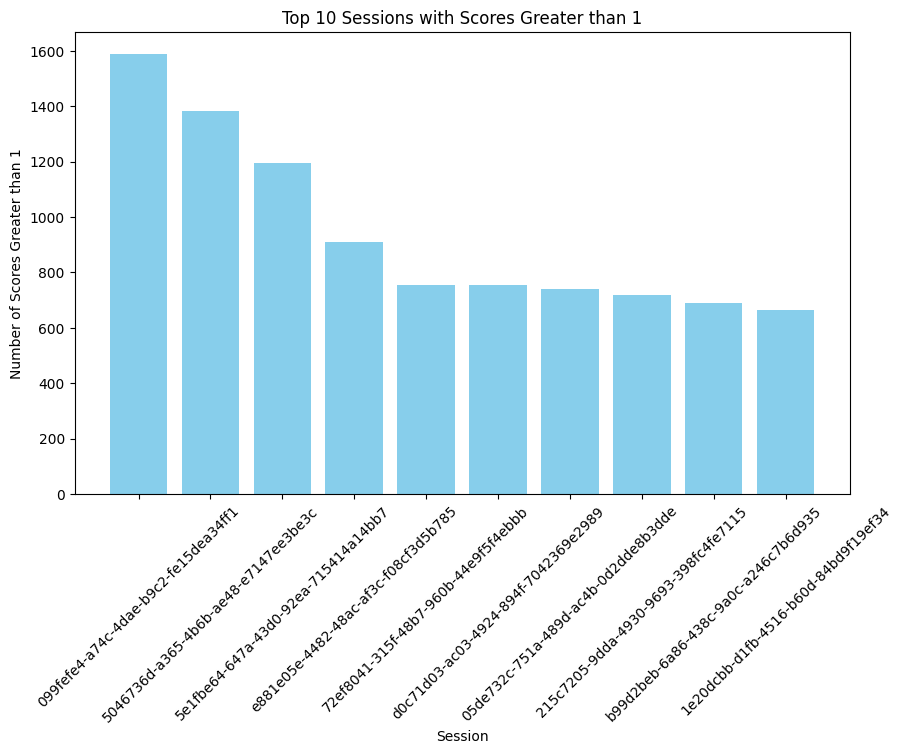

In [ ]:
import matplotlib.pyplot as plt

def count_early_predictions(y_pred):
    X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
    X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
    X_test['session_index'] = featured_test_df['session_index']
    X_test['total_events'] = featured_test_df['total_events']
    X_test['pred_purchase'] = y_pred

    X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
    X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

    # Filter rows where max_score is greater than 1.0
    X_test_filtered = X_test[X_test['max_score'] > 1.0]

    # Count the number of sessions with max_score > 1.0
    score_count = X_test_filtered['session'].nunique()

    # Return the filtered DataFrame and the score count
    return X_test_filtered, score_count

# Example usage
X_test_filtered, score_count = count_early_predictions(y_pred_over_and_under_dt)

# Group by session and count the occurrences
session_counts = X_test_filtered.groupby('session').size().reset_index(name='count')

# Sort the sessions by count and select the top 10
top_10_sessions = session_counts.sort_values(by='count', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top_10_sessions['session'], top_10_sessions['count'], color='skyblue')
plt.xlabel('Session')
plt.ylabel('Number of Scores Greater than 1')
plt.title('Top 10 Sessions with Scores Greater than 1')
plt.xticks(rotation=45)
plt.show()

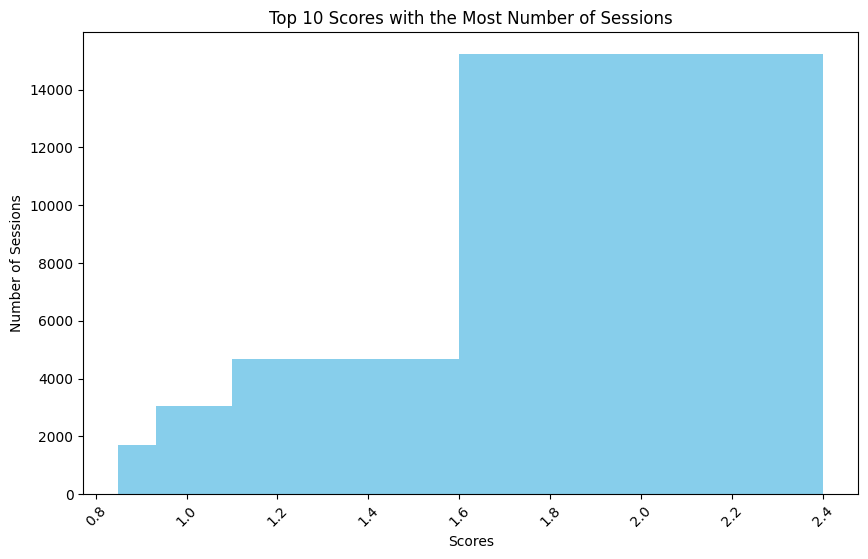

In [ ]:
import matplotlib.pyplot as plt

def count_early_predictions(y_pred):
    X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
    X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
    X_test['session_index'] = featured_test_df['session_index']
    X_test['total_events'] = featured_test_df['total_events']
    X_test['pred_purchase'] = y_pred

    X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
    X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

    # Filter rows where max_score is greater than 1.0
    X_test_filtered = X_test[X_test['max_score'] > 1.0]

    return X_test_filtered

# Example usage
X_test_filtered = count_early_predictions(y_pred_over_and_under_dt)

# Count the number of sessions for each unique score
score_counts = X_test_filtered['max_score'].value_counts().reset_index()
score_counts.columns = ['score', 'session_count']

# Sort the scores by session count and select the top 10
top_10_scores = score_counts.sort_values(by='session_count', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top_10_scores['score'], top_10_scores['session_count'], color='skyblue')
plt.xlabel('Scores')
plt.ylabel('Number of Sessions')
plt.title('Top 10 Scores with the Most Number of Sessions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
featured_test_df[featured_test_df['session'] == 'fffffc08-81e3-4050-9cd6-a5301f79f6f1']

Empty DataFrame
Columns: [ts, type, aid, category, session, purchase, day_of_year, day_of_week, day_of_month, month, hour, timeofday, weekend, total_viewed_items, total_unique_items, total_unique_categories, max_popularity, min_popularity, session_duration, click_rate, event_dwell_time, product_dwell_time, day, trendiness_0_5, trendiness_0_7, trendiness_0_9, session_index, first_purchase_index, last_purchase_index, total_events]
Index: []

In [ ]:
X_test[X_test['purchase'] == 1]['session'].nunique()

10000

In [ ]:
# Group by max_score and count the number of sessions for each score
score_session_counts = X_test[
    (X_test['purchase'] == 1) & (X_test['max_score'] > 1) & (X_test['max_score'] < 2)
  ].groupby('max_score')['session'].nunique().reset_index(name='session_count')

# Sort the scores by the count of sessions and select the top 10
top_20_scores = score_session_counts.sort_values(by='session_count', ascending=False).head(20)

# Return the result
top_20_scores

max_score  session_count
238   1.500000            227
140   1.333333            175
375   1.666667            118
100   1.250000            105
75    1.200000             95
319   1.600000             91
467   1.750000             75
176   1.400000             70
423   1.714286             68
193   1.428571             66
539   1.800000             59
337   1.625000             56
283   1.555556             54
295   1.571429             53
61    1.166667             51
51    1.142857             46
163   1.375000             43
115   1.285714             43
584   1.833333             38
348   1.636364             37

In [ ]:
score_session_counts

max_score  session_count
0     1.015385              1
1     1.016393              1
2     1.019538              1
3     1.025000              1
4     1.027778              1
..         ...            ...
884   1.984127              1
885   1.986486              1
886   1.986957              1
887   1.989071              1
888   1.991803              1

[889 rows x 2 columns]